<a href="https://colab.research.google.com/github/marcosoares-92/IndustrialDataScienceWorkflow/blob/main/model_project/steel_industry_energy_consumption/etl_3_Dataset_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Transformation**

## _ETL Workflow Notebook 3_

## Content:
1. Removing trailing or leading white spaces or characters (trim) from string variables, and modifying the variable type;
2. Capitalizing or lowering case of string variables (string homogenizing);
3. Adding contractions to the contractions library;
4. Correcting contracted strings;
5. Substituting (replacing) substrings on string variables;
6. Inverting the order of the string characters;
7. Slicing the strings;
8. Getting the leftest characters from the strings (retrieve last characters);
9. Getting the rightest characters from the strings (retrieve first characters);
10. Joining strings from a same column into a single string;
11. Joining several string columns into a single string column;
12. Splitting strings into a list of strings;
13. Substituting (replacing or switching) whole strings by different text values (on string variables);
14. Replacing strings with Machine Learning: finding similar strings and replacing them by standard strings;
15. Searching for Regular Expression (RegEx) within a string column;
16. Replacing a Regular Expression (RegEx) from a string column;
17. Transforming the dataset and reverse transforms: log-transform; 
18. Exponential transform; 
19. Box-Cox transform; 
20. One-Hot Encoding;
21. Ordinal Encoding;
22. Feature scaling; 
23. Importing or exporting models and dictionaries.

Marco Cesar Prado Soares, Data Scientist Specialist - Bayer Crop Science LATAM
- marcosoares.feq@gmail.com
- marco.soares@bayer.com

In [ ]:
# To install a library (e.g. tensorflow), unmark and run:
# ! pip install tensorflow
# to update a library (e.g. tensorflow), unmark and run:
# ! pip install tensorflow --upgrade
# to update pip, unmark and run:
# ! pip install pip --upgrade
# to show if a library is installed and visualize its information, unmark and run
# (e.g. tensorflow):
# ! pip show tensorflow
# To run a Python file (e.g idsw_etl.py) saved in the notebook's workspace directory,
# unmark and run:
# import idsw_etl
# or:
# import idsw_etl as etl

## **Load Python Libraries in Global Context**

In [ ]:
# Run installed library
import pandas as pd
import numpy as np
import idsw
from idsw import etl
from idsw.etl import etl_workflow as ewf

In [ ]:
# Run Python files
import numpy as np
import pandas as pd
import idsw
from etl import etl_workflow as ewf

## **Call the functions**

### **Mounting Google Drive or S3 (AWS Simple Storage Service) bucket**

In [ ]:
SOURCE = 'google'
# SOURCE = 'google' for mounting the google drive;
# SOURCE = 'aws' for accessing an AWS S3 bucket

## THE FOLLOWING PARAMETERS HAVE EFFECT ONLY WHEN SOURCE == 'aws':

PATH_TO_STORE_IMPORTED_S3_BUCKET = ''
# PATH_TO_STORE_IMPORTED_S3_BUCKET: path of the Python environment to which the
# S3 bucket contents will be imported. If it is None; or if it is an empty string; or if 
# PATH_TO_STORE_IMPORTED_S3_BUCKET = '/', bucket will be imported to the root path. 
# Alternatively, input the path as a string (in quotes). e.g. 
# PATH_TO_STORE_IMPORTED_S3_BUCKET = 'copied_s3_bucket'

S3_BUCKET_NAME = 'my_bucket'
## This parameter is obbligatory to access an AWS S3 bucket. Substitute it for a string
# with the bucket's name. e.g. s3_bucket_name = "aws-bucket-1" access a bucket named as
# "aws-bucket-1"

S3_OBJECT_FOLDER_PREFIX = ""
# S3_OBJECT_FOLDER_PREFIX = None. Keep it None; or as an empty string 
# (S3_OBJECT_FOLDER_PREFIX = ''); or as the root "/" to import the 
# whole bucket content, instead of a single object from it.
# Alternatively, set it as a string containing the subfolder from the bucket to import:
# Suppose that your bucket (admin-created) has four objects with the following object 
# keys: Development/Projects1.xls; Finance/statement1.pdf; Private/taxdocument.pdf; and
# s3-dg.pdf. 
# The s3-dg.pdf key does not have a prefix, so its object appears directly 
# at the root level of the bucket. If you open the Development/ folder, you see 
# the Projects.xlsx object in it.
# In summary, if the path of the file is: 'bucket/my_path/.../file.csv'
# where 'bucket' is the bucket's name, prefix = 'my_path/.../', without the
# 'file.csv' (file name with extension) last part.

# So, declare the prefix as S3_OBJECT_FOLDER_PREFIX to import only files from
# a given folder (directory) of the bucket.
# DO NOT PUT A SLASH before (to the right of) the prefix;
# DO NOT ADD THE BUCKET'S NAME TO THE right of the prefix:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/"

# Alternatively, provide the full path of a given file if you want to import only it:
# S3_OBJECT_FOLDER_PREFIX = "bucket_directory1/.../bucket_directoryN/my_file.ext"
# where my_file is the file's name, and ext is its extension.


# Attention: after running this function for fetching AWS Simple Storage System (S3), 
# your 'AWS Access key ID' and your 'Secret access key' will be requested.
# The 'Secret access key' will be hidden through dots, so it cannot be visualized or copied by
# other users. On the other hand, the same is not true for 'Access key ID', the bucket's name 
# and the prefix. All of these are sensitive information from the organization.
# Therefore, after importing the information, always remember of cleaning the output of this cell
# and of removing such information from the strings.
# Remember that these data may contain privilege for accessing protected information, 
# so it should not be used for non-authorized people.

# Also, remember of deleting the imported files from the workspace after finishing the analysis.
# The costs for storing the files in S3 is quite inferior than those for storing directly in the
# workspace. Also, files stored in S3 may be accessed for other users than those with access to
# the notebook's workspace.
idsw.mount_storage_system (source = SOURCE, path_to_store_imported_s3_bucket = PATH_TO_STORE_IMPORTED_S3_BUCKET, s3_bucket_name = S3_BUCKET_NAME, s3_obj_prefix = S3_OBJECT_FOLDER_PREFIX)

### **Importing the dataset**

In [ ]:
## WARNING: Use this function to load dataframes stored on Excel (xls, xlsx, xlsm, xlsb, odf, ods and odt), 
## JSON, txt, or CSV (comma separated values) files.

FILE_DIRECTORY_PATH = "/content/drive/MyDrive/model_project/steel_industry_energy_consumption"
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"

FILE_NAME_WITH_EXTENSION = "dataset_cleaned.csv"
# FILE_NAME_WITH_EXTENSION - (string, in quotes): input the name of the file with the 
# extension. e.g. FILE_NAME_WITH_EXTENSION = "file.xlsx", or, 
# FILE_NAME_WITH_EXTENSION = "file.csv", "file.txt", or "file.json"
# Again, the extensions may be: xls, xlsx, xlsm, xlsb, odf, ods, odt, json, txt or csv.

LOAD_TXT_FILE_WITH_JSON_FORMAT = False
# LOAD_TXT_FILE_WITH_JSON_FORMAT = False. Set LOAD_TXT_FILE_WITH_JSON_FORMAT = True 
# if you want to read a file with txt extension containing a text formatted as JSON 
# (but not saved as JSON).
# WARNING: if LOAD_TXT_FILE_WITH_JSON_FORMAT = True, all the JSON file parameters of the 
# function (below) must be set. If not, an error message will be raised.

HOW_MISSING_VALUES_ARE_REGISTERED = None
# HOW_MISSING_VALUES_ARE_REGISTERED = None: keep it None if missing values are registered as None,
# empty or np.nan. Pandas automatically converts None to NumPy np.nan objects (floats).
# This parameter manipulates the argument na_values (default: None) from Pandas functions.
# By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, 
#‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, 
# ‘n/a’, ‘nan’, ‘null’.

# If a different denomination is used, indicate it as a string. e.g.
# HOW_MISSING_VALUES_ARE_REGISTERED = '.' will convert all strings '.' to missing values;
# HOW_MISSING_VALUES_ARE_REGISTERED = 0 will convert zeros to missing values.

# If dict passed, specific per-column NA values. For example, if zero is the missing value
# only in column 'numeric_col', you can specify the following dictionary:
# how_missing_values_are_registered = {'numeric-col': 0}

    
HAS_HEADER = True
# HAS_HEADER = True if the the imported table has headers (row with columns names).
# Alternatively, HAS_HEADER = False if the dataframe does not have header.

DECIMAL_SEPARATOR = '.'
# DECIMAL_SEPARATOR = '.' - String. Keep it '.' or None to use the period ('.') as
# the decimal separator. Alternatively, specify here the separator.
# e.g. DECIMAL_SEPARATOR = ',' will set the comma as the separator.
# It manipulates the argument 'decimal' from Pandas functions.

TXT_CSV_COL_SEP = "comma"
# txt_csv_col_sep = "comma" - This parameter has effect only when the file is a 'txt'
# or 'csv'. It informs how the different columns are separated.
# Alternatively, txt_csv_col_sep = "comma", or txt_csv_col_sep = "," 
# for columns separated by comma;
# txt_csv_col_sep = "whitespace", or txt_csv_col_sep = " " 
# for columns separated by simple spaces.
# You can also set a specific separator as string. For example:
# txt_csv_col_sep = '\s+'; or txt_csv_col_sep = '\t' (in this last example, the tabulation
# is used as separator for the columns - '\t' represents the tab character).

## Parameters for loading Excel files:

LOAD_ALL_SHEETS_AT_ONCE = False
# LOAD_ALL_SHEETS_AT_ONCE = False - This parameter has effect only when for Excel files.
# If LOAD_ALL_SHEETS_AT_ONCE = True, the function will return a list of dictionaries, each
# dictionary containing 2 key-value pairs: the first key will be 'sheet', and its
# value will be the name (or number) of the table (sheet). The second key will be 'df',
# and its value will be the pandas dataframe object obtained from that sheet.
# This argument has preference over SHEET_TO_LOAD. If it is True, all sheets will be loaded.
    
SHEET_TO_LOAD = None
# SHEET_TO_LOAD - This parameter has effect only when for Excel files.
# keep SHEET_TO_LOAD = None not to specify a sheet of the file, so that the first sheet
# will be loaded.
# SHEET_TO_LOAD may be an integer or an string (inside quotes). SHEET_TO_LOAD = 0
# loads the first sheet (sheet with index 0); SHEET_TO_LOAD = 1 loads the second sheet
# of the file (index 1); SHEET_TO_LOAD = "Sheet1" loads a sheet named as "Sheet1".
# Declare a number to load the sheet with that index, starting from 0; or declare a
# name to load the sheet with that name.

## Parameters for loading JSON files:

JSON_RECORD_PATH = None
# JSON_RECORD_PATH (string): manipulate parameter 'record_path' from json_normalize method.
# Path in each object to list of records. If not passed, data will be assumed to 
# be an array of records. If a given field from the JSON stores a nested JSON (or a nested
# dictionary) declare it here to decompose the content of the nested data. e.g. if the field
# 'books' stores a nested JSON, declare, JSON_RECORD_PATH = 'books'

JSON_FIELD_SEPARATOR = "_"
# JSON_FIELD_SEPARATOR = "_" (string). Manipulates the parameter 'sep' from json_normalize method.
# Nested records will generate names separated by sep. 
# e.g., for JSON_FIELD_SEPARATOR = ".", {‘foo’: {‘bar’: 0}} -> foo.bar.
# Then, if a given field 'main_field' stores a nested JSON with fields 'field1', 'field2', ...
# the name of the columns of the dataframe will be formed by concatenating 'main_field', the
# separator, and the names of the nested fields: 'main_field_field1', 'main_field_field2',...

JSON_METADATA_PREFIX_LIST = None
# JSON_METADATA_PREFIX_LIST: list of strings (in quotes). Manipulates the parameter 
# 'meta' from json_normalize method. Fields to use as metadata for each record in resulting 
# table. Declare here the non-nested fields, i.e., the fields in the principal JSON. They
# will be repeated in the rows of the dataframe to give the metadata (context) of the rows.

# e.g. Suppose a JSON with the following structure: {'name': 'Mary', 'last': 'Shelley',
# 'books': [{'title': 'Frankestein', 'year': 1818}, {'title': 'Mathilda ', 'year': 1819},{'title': 'The Last Man', 'year': 1826}]},
# Here, there are nested JSONs in the field 'books'. The fields that are not nested
# are 'name' and 'last'.
# Then, JSON_RECORD_PATH = 'books'
# JSON_METADATA_PREFIX_LIST = ['name', 'last']


# The dataframe will be stored in the object named 'dataset':
# Simply modify this object on the left of equality:
dataset = idsw.load_pandas_dataframe (file_directory_path = FILE_DIRECTORY_PATH, file_name_with_extension = FILE_NAME_WITH_EXTENSION, load_txt_file_with_json_format = LOAD_TXT_FILE_WITH_JSON_FORMAT, how_missing_values_are_registered = HOW_MISSING_VALUES_ARE_REGISTERED, has_header = HAS_HEADER, decimal_separator = DECIMAL_SEPARATOR, txt_csv_col_sep = TXT_CSV_COL_SEP, load_all_sheets_at_once = LOAD_ALL_SHEETS_AT_ONCE, sheet_to_load = SHEET_TO_LOAD, json_record_path = JSON_RECORD_PATH, json_field_separator = JSON_FIELD_SEPARATOR, json_metadata_prefix_list = JSON_METADATA_PREFIX_LIST)

# OBS: If an Excel file is loaded and LOAD_ALL_SHEETS_AT_ONCE = True, then the object
# dataset will be a list of dictionaries, with 'sheet' as key containing the sheet name; and 'df'
# as key correspondent to the Pandas dataframe. So, to access the 3rd dataframe (index 2, since
# indexing starts from zero): df = dataframe[2]['df'], where dataframe is the list returned.

Tokenization took: 1.06 ms
Type conversion took: 3.22 ms
Parser memory cleanup took: 0.01 ms
Dataset extracted from /content/drive/MyDrive/model_project/steel_industry_energy_consumption/dataset_cleaned.csv. Check the 10 first rows of this dataframe:



,timestamp,month,week,day,day_of_week,load_type,lagging_current_reactive_power_kvarh,leading_current_reactive_power_kvarh,co2_tco2,lagging_current_power_factor,leading_current_power_factor,nsm,usage_kwh
0,2018-01-01 00:00:00,1,1,1,Monday,Light_Load,3.986667,0.000000,0.000000,66.150417,100.000000,10350.0,3.498333
1,2018-01-01 06:00:00,1,1,1,Monday,Light_Load,1.994583,7.832917,0.000000,82.951250,64.299167,31950.0,3.640833
2,2018-01-01 12:00:00,1,1,1,Monday,Light_Load,0.000000,18.429167,0.000000,100.000000,21.776667,53550.0,3.833750
3,2018-01-01 18:00:00,1,1,1,Monday,Light_Load,0.961250,13.277917,0.000000,92.095833,42.228750,75150.0,3.687917
4,2018-01-02 00:00:00,1,1,2,Thursday,Light_Load,15.584167,0.000000,0.010417,77.164583,100.000000,10350.0,26.022917
5,2018-01-02 06:00:00,1,1,2,Thursday,Light_Load,33.150833,0.001667,0.030000,84.316667,100.000000,31950.0,68.396250
6,2018-01-02 12:00:00,1,1,2,Thursday,Medium_Load,34.658750,4.141667,0.034167,92.470000,91.563750,53550.0,77.831667
7,2018-01-02 18:00:00,1,1,2,Thursday,Maximum_Load,33.745417,0.352083,0.038750,92.103333,99.984583,75150.0,82.526667
8,2018-01-03 00:00:00,1,1,3,Thursday,Light_Load,4.951250,0.000000,0.000000,62.464167,100.000000,10350.0,3.940000
9,2018-01-03 06:00:00,1,1,3,Thursday,Light_Load,11.874583,0.682500,0.013750,80.681250,99.920417,31950.0,32.161250


### **Removing trailing or leading white spaces or characters (trim) from string variables, and modifying the variable type**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'day_of_week'
# COLUMN_TO_ANALYZE: string (inside quotes), 
# containing the name of the column that will be analyzed. 
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

NEW_VARIABLE_TYPE = None
# NEW_VARIABLE_TYPE = None. String (in quotes) that represents a given data type for the column
# after transformation. Set:
# - NEW_VARIABLE_TYPE = 'int' to convert the column to integer type after the transform;
# - NEW_VARIABLE_TYPE = 'float' to convert the column to float (decimal number);
# - NEW_VARIABLE_TYPE = 'datetime' to convert it to date or timestamp;
# - NEW_VARIABLE_TYPE = 'category' to convert it to Pandas categorical variable.
    
METHOD = 'trim'
# METHOD = 'trim' will eliminate trailing and leading white spaces from the strings in
# COLUMN_TO_ANALYZE.
# METHOD = 'substring' will eliminate a defined trailing and leading substring from
# COLUMN_TO_ANALYZE.

SUBSTRING_TO_ELIMINATE = None
# SUBSTRING_TO_ELIMINATE = None. Set as a string (in quotes) if METHOD = 'substring'.
# e.g. suppose COLUMN_TO_ANALYZE contains time information: each string ends in " min":
# "1 min", "2 min", "3 min", etc. If SUBSTRING_TO_ELIMINATE = " min", this portion will be
# eliminated, resulting in: "1", "2", "3", etc. If NEW_VARIABLE_TYPE = None, these values will
# continue to be strings. By setting NEW_VARIABLE_TYPE = 'int' or 'float', the series will be
# converted to a numeric type.

CREATE_NEW_COLUMN = False
# CREATE_NEW_COLUMN = True
# Alternatively, set CREATE_NEW_COLUMN = True to store the transformed data into a new
# column. Or set CREATE_NEW_COLUMN = False to overwrite the existing column.
NEW_COLUMN_SUFFIX = '_trim'
# NEW_COLUMN_SUFFIX = "_trim"
# This value has effect only if CREATE_NEW_COLUMN = True.
# The new column name will be set as column + NEW_COLUMN_SUFFIX. Then, if the original
# column was "column1" and the suffix is "_trim", the new column will be named as
# "column1_trim".
# Alternatively, input inside quotes a string with the desired suffix. Recommendation:
# start the suffix with "_" to separate it from the original name.
    

# The dataframe will be stored in the object named transf_dataset:
# Simply modify this object on the left of equality:
dataset = ewf.trim_spaces_or_characters (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, new_variable_type = NEW_VARIABLE_TYPE, method = METHOD, substring_to_eliminate = SUBSTRING_TO_ELIMINATE, create_new_column = CREATE_NEW_COLUMN, new_column_suffix = NEW_COLUMN_SUFFIX)

Finished removing leading and trailing spaces or characters (substrings).
Check the 10 first elements from the series:



0      Monday
1      Monday
2      Monday
3      Monday
4    Thursday
5    Thursday
6    Thursday
7    Thursday
8    Thursday
9    Thursday
Name: day_of_week, dtype: object

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'load_type'
# COLUMN_TO_ANALYZE: string (inside quotes), 
# containing the name of the column that will be analyzed. 
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

NEW_VARIABLE_TYPE = None
# NEW_VARIABLE_TYPE = None. String (in quotes) that represents a given data type for the column
# after transformation. Set:
# - NEW_VARIABLE_TYPE = 'int' to convert the column to integer type after the transform;
# - NEW_VARIABLE_TYPE = 'float' to convert the column to float (decimal number);
# - NEW_VARIABLE_TYPE = 'datetime' to convert it to date or timestamp;
# - NEW_VARIABLE_TYPE = 'category' to convert it to Pandas categorical variable.
    
METHOD = 'trim'
# METHOD = 'trim' will eliminate trailing and leading white spaces from the strings in
# COLUMN_TO_ANALYZE.
# METHOD = 'substring' will eliminate a defined trailing and leading substring from
# COLUMN_TO_ANALYZE.

SUBSTRING_TO_ELIMINATE = None
# SUBSTRING_TO_ELIMINATE = None. Set as a string (in quotes) if METHOD = 'substring'.
# e.g. suppose COLUMN_TO_ANALYZE contains time information: each string ends in " min":
# "1 min", "2 min", "3 min", etc. If SUBSTRING_TO_ELIMINATE = " min", this portion will be
# eliminated, resulting in: "1", "2", "3", etc. If NEW_VARIABLE_TYPE = None, these values will
# continue to be strings. By setting NEW_VARIABLE_TYPE = 'int' or 'float', the series will be
# converted to a numeric type.

CREATE_NEW_COLUMN = False
# CREATE_NEW_COLUMN = True
# Alternatively, set CREATE_NEW_COLUMN = True to store the transformed data into a new
# column. Or set CREATE_NEW_COLUMN = False to overwrite the existing column.
NEW_COLUMN_SUFFIX = '_trim'
# NEW_COLUMN_SUFFIX = "_trim"
# This value has effect only if CREATE_NEW_COLUMN = True.
# The new column name will be set as column + NEW_COLUMN_SUFFIX. Then, if the original
# column was "column1" and the suffix is "_trim", the new column will be named as
# "column1_trim".
# Alternatively, input inside quotes a string with the desired suffix. Recommendation:
# start the suffix with "_" to separate it from the original name.
    

# The dataframe will be stored in the object named transf_dataset:
# Simply modify this object on the left of equality:
dataset = ewf.trim_spaces_or_characters (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, new_variable_type = NEW_VARIABLE_TYPE, method = METHOD, substring_to_eliminate = SUBSTRING_TO_ELIMINATE, create_new_column = CREATE_NEW_COLUMN, new_column_suffix = NEW_COLUMN_SUFFIX)

Finished removing leading and trailing spaces or characters (substrings).
Check the 10 first elements from the series:



0      Light_Load
1      Light_Load
2      Light_Load
3      Light_Load
4      Light_Load
5      Light_Load
6     Medium_Load
7    Maximum_Load
8      Light_Load
9      Light_Load
Name: load_type, dtype: object

### **Capitalizing or lowering case of string variables (string homogenizing)**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'day_of_week'
# COLUMN_TO_ANALYZE: string (inside quotes), 
# containing the name of the column that will be analyzed. 
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

METHOD = 'lowercase'
# METHOD = 'capitalize' will capitalize all letters from the input string 
# (turn them to upper case).
# METHOD = 'lowercase' will make the opposite: turn all letters to lower case.
# e.g. suppose COLUMN_TO_ANALYZE contains strings such as 'String One', 'STRING 2',  and
# 'string3'. If METHOD = 'capitalize', the output will contain the strings: 
# 'STRING ONE', 'STRING 2', 'STRING3'. If METHOD = 'lowercase', the outputs will be:
# 'string one', 'string 2', 'string3'.

CREATE_NEW_COLUMN = False
# CREATE_NEW_COLUMN = True
# Alternatively, set CREATE_NEW_COLUMN = True to store the transformed data into a new
# column. Or set CREATE_NEW_COLUMN = False to overwrite the existing column.
NEW_COLUMN_SUFFIX = '_homogenized'
# NEW_COLUMN_SUFFIX = "_homogenized"
# This value has effect only if CREATE_NEW_COLUMN = True.
# The new column name will be set as column + NEW_COLUMN_SUFFIX. Then, if the original
# column was "column1" and the suffix is "_homogenized", the new column will be named as
# "column1_homogenized".
# Alternatively, input inside quotes a string with the desired suffix. Recommendation:
# start the suffix with "_" to separate it from the original name.
    
    
# The dataframe will be stored in the object named transf_dataset:
# Simply modify this object on the left of equality:
dataset = ewf.capitalize_or_lower_string_case (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, method = METHOD, create_new_column = CREATE_NEW_COLUMN, new_column_suffix = NEW_COLUMN_SUFFIX)

Lowering the string case (moving all characters to lower case).

Finished homogenizing the string case of day_of_week, giving value consistency.
Check the 10 first elements from the series:



0      monday
1      monday
2      monday
3      monday
4    thursday
5    thursday
6    thursday
7    thursday
8    thursday
9    thursday
Name: day_of_week, dtype: object

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'load_type'
# COLUMN_TO_ANALYZE: string (inside quotes), 
# containing the name of the column that will be analyzed. 
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

METHOD = 'lowercase'
# METHOD = 'capitalize' will capitalize all letters from the input string 
# (turn them to upper case).
# METHOD = 'lowercase' will make the opposite: turn all letters to lower case.
# e.g. suppose COLUMN_TO_ANALYZE contains strings such as 'String One', 'STRING 2',  and
# 'string3'. If METHOD = 'capitalize', the output will contain the strings: 
# 'STRING ONE', 'STRING 2', 'STRING3'. If METHOD = 'lowercase', the outputs will be:
# 'string one', 'string 2', 'string3'.

CREATE_NEW_COLUMN = False
# CREATE_NEW_COLUMN = True
# Alternatively, set CREATE_NEW_COLUMN = True to store the transformed data into a new
# column. Or set CREATE_NEW_COLUMN = False to overwrite the existing column.
NEW_COLUMN_SUFFIX = '_homogenized'
# NEW_COLUMN_SUFFIX = "_homogenized"
# This value has effect only if CREATE_NEW_COLUMN = True.
# The new column name will be set as column + NEW_COLUMN_SUFFIX. Then, if the original
# column was "column1" and the suffix is "_homogenized", the new column will be named as
# "column1_homogenized".
# Alternatively, input inside quotes a string with the desired suffix. Recommendation:
# start the suffix with "_" to separate it from the original name.
    
    
# The dataframe will be stored in the object named transf_dataset:
# Simply modify this object on the left of equality:
dataset = ewf.capitalize_or_lower_string_case (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, method = METHOD, create_new_column = CREATE_NEW_COLUMN, new_column_suffix = NEW_COLUMN_SUFFIX)

Lowering the string case (moving all characters to lower case).

Finished homogenizing the string case of load_type, giving value consistency.
Check the 10 first elements from the series:



0      light_load
1      light_load
2      light_load
3      light_load
4      light_load
5      light_load
6     medium_load
7    maximum_load
8      light_load
9      light_load
Name: load_type, dtype: object

### **Substituting (replacing) substrings on string variables**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'load_type'
# COLUMN_TO_ANALYZE: string (inside quotes), 
# containing the name of the column that will be analyzed. 
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

SUBSTRING_TO_BE_REPLACED = "_load"
NEW_SUBSTRING_FOR_REPLACEMENT = ''
# SUBSTRING_TO_BE_REPLACED = None; new_substring_for_replacement = ''. 
# Strings (in quotes): when the sequence of characters SUBSTRING_TO_BE_REPLACED was
# found in the strings from column_to_analyze, it will be substituted by the substring
# NEW_SUBSTRING_FOR_REPLACEMENT. If None is provided to one of these substring arguments,
# it will be substituted by the empty string: ''
# e.g. suppose COLUMN_TO_ANALYZE contains the following strings, with a spelling error:
# "my collumn 1", 'his collumn 2', 'her column 3'. We may correct this error by setting:
# SUBSTRING_TO_BE_REPLACED = 'collumn' and NEW_SUBSTRING_FOR_REPLACEMENT = 'column'. The
# function will search for the wrong group of characters and, if it finds it, will substitute
# by the correct sequence: "my column 1", 'his column 2', 'her column 3'.

CREATE_NEW_COLUMN = False
# CREATE_NEW_COLUMN = True
# Alternatively, set CREATE_NEW_COLUMN = True to store the transformed data into a new
# column. Or set CREATE_NEW_COLUMN = False to overwrite the existing column.
NEW_COLUMN_SUFFIX = '_substringReplaced'
# NEW_COLUMN_SUFFIX = "_substringReplaced"
# This value has effect only if CREATE_NEW_COLUMN = True.
# The new column name will be set as column + NEW_COLUMN_SUFFIX. Then, if the original
# column was "column1" and the suffix is "_substringReplaced", the new column will be named as
# "column1_substringReplaced".
# Alternatively, input inside quotes a string with the desired suffix. Recommendation:
# start the suffix with "_" to separate it from the original name.


# The dataframe will be stored in the object named transf_dataset:
# Simply modify this object on the left of equality:
dataset = ewf.replace_substring (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, substring_to_be_replaced = SUBSTRING_TO_BE_REPLACED, new_substring_for_replacement = NEW_SUBSTRING_FOR_REPLACEMENT, create_new_column = CREATE_NEW_COLUMN, new_column_suffix = NEW_COLUMN_SUFFIX)

ATTENTION: Operations of string strip (removal) or replacement are all case-sensitive. There must be correct correspondence between cases and spaces for the strings being removed or replaced.

Finished replacing the substring _load by .
Check the 10 first elements from the series:



0      light
1      light
2      light
3      light
4      light
5      light
6     medium
7    maximum
8      light
9      light
Name: load_type, dtype: object

### **Substituting (replacing or switching) whole strings by different text values (on string variables)**

# Since the days of week do not appear in order in the dataset, applying the ordinal encoding would create an erroneous order.
- Let's replace the days by the correspondent number, and then modify the variable type.

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'day_of_week'
# COLUMN_TO_ANALYZE: string (inside quotes), 
# containing the name of the column that will be analyzed. 
# e.g. COLUMN_TO_ANALYZE = "column1" will analyze the column named as 'column1'.

LIST_OF_DICTIONARIES_WITH_ORIGINAL_STRINGS_AND_REPLACEMENTS = [
    
    {'original_string': 'monday', 'new_string': 1}, 
    {'original_string': 'tuesday', 'new_string': 2}, 
    {'original_string': 'wednesday', 'new_string': 3}, 
    {'original_string': 'thursday', 'new_string': 4}, 
    {'original_string': 'friday', 'new_string': 5}, 
    {'original_string': 'saturday', 'new_string': 6}, 
    {'original_string': 'sunday', 'new_string': 7}, 
    {'original_string': None, 'new_string': None}, 
    {'original_string': None, 'new_string': None}, 
    {'original_string': None, 'new_string': None}, 
    {'original_string': None, 'new_string': None}
    
]
# LIST_OF_DICTIONARIES_WITH_ORIGINAL_STRINGS_AND_REPLACEMENTS = 
# [{'original_string': None, 'new_string': None}]
# This is a list of dictionaries, where each dictionary contains two key-value pairs:
# the first one contains the original string; and the second one contains the new string
# that will substitute the original one. The function will loop through all dictionaries in
# this list, access the values of the keys 'original_string', and search these values on the strings
# in COLUMN_TO_ANALYZE. When the value is found, it will be replaced (switched) by the correspondent
# value in key 'new_string'.
    
# The object LIST_OF_DICTIONARIES_WITH_ORIGINAL_STRINGS_AND_REPLACEMENTS must be declared as a list, 
# in brackets, even if there is a single dictionary.
# Use always the same keys: 'original_string' for the original strings to search on the column 
# column_to_analyze; and 'new_string', for the strings that will replace the original ones.
# Notice that this function will not search for substrings: it will substitute a value only when
# there is perfect correspondence between the string in 'column_to_analyze' and 'original_string'.
# So, the cases (upper or lower) must be the same.
    
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to replace more
# values.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'original_string': original_str, 'new_string': new_str}, 
# where original_str and new_str represent the strings for searching and replacement 
# (If one of the keys contains None, the new dictionary will be ignored).
    
# Example:
# Suppose the COLUMN_TO_ANALYZE contains the values 'sunday', 'monday', 'tuesday', 'wednesday',
# 'thursday', 'friday', 'saturday', but you want to obtain data labelled as 'weekend' or 'weekday'.
# Set: LIST_OF_DICTIONARIES_WITH_ORIGINAL_STRINGS_AND_REPLACEMENTS = 
# [{'original_string': 'sunday', 'new_string': 'weekend'},
# {'original_string': 'saturday', 'new_string': 'weekend'},
# {'original_string': 'monday', 'new_string': 'weekday'},
# {'original_string': 'tuesday', 'new_string': 'weekday'},
# {'original_string': 'wednesday', 'new_string': 'weekday'},
# {'original_string': 'thursday', 'new_string': 'weekday'},
# {'original_string': 'friday', 'new_string': 'weekday'}]

CREATE_NEW_COLUMN = False
# CREATE_NEW_COLUMN = True
# Alternatively, set CREATE_NEW_COLUMN = True to store the transformed data into a new
# column. Or set CREATE_NEW_COLUMN = False to overwrite the existing column.
NEW_COLUMN_SUFFIX = '_stringReplaced'
# NEW_COLUMN_SUFFIX = "_stringReplaced"
# This value has effect only if CREATE_NEW_COLUMN = True.
# column was "column1" and the suffix is "_stringReplaced", the new column will be named as
# "column1_stringReplaced".
# Alternatively, input inside quotes a string with the desired suffix. Recommendation:
# start the suffix with "_" to separate it from the original name.


# The dataframe will be stored in the object named transf_dataset:
# Simply modify this object on the left of equality:
dataset = ewf.switch_strings (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, list_of_dictionaries_with_original_strings_and_replacements = LIST_OF_DICTIONARIES_WITH_ORIGINAL_STRINGS_AND_REPLACEMENTS, create_new_column = CREATE_NEW_COLUMN, new_column_suffix = NEW_COLUMN_SUFFIX)

ATTENTION: Operations of string strip (removal) or replacement are all case-sensitive. There must be correct correspondence between cases and spaces for the strings being removed or replaced.

Finished replacing the substrings accordingly to the mapping: {'monday': '1', 'tuesday': '2', 'wednesday': '3', 'thursday': '4', 'friday': '5', 'saturday': '6', 'sunday': '7'}.
Check the 10 first elements from the series:



0    1
1    1
2    1
3    1
4    4
5    4
6    4
7    4
8    4
9    4
Name: day_of_week, dtype: object

In [ ]:
# convert to integer 64 bits
dataset['day_of_week'] = dataset['day_of_week'].astype(np.int64)

# Before deciding the normalization strategy, let's check if the numeric variables have zero or negative values.

In [ ]:
dataset.columns

Index(['timestamp', 'month', 'week', 'day', 'day_of_week', 'load_type',
       'lagging_current_reactive_power_kvarh',
       'leading_current_reactive_power_kvarh', 'co2_tco2',
       'lagging_current_power_factor', 'leading_current_power_factor', 'nsm',
       'usage_kwh'],
      dtype='object')

In [ ]:
print('lagging_current_reactive_power_kvarh', dataset['lagging_current_reactive_power_kvarh'].min())
print('leading_current_reactive_power_kvarh', dataset['leading_current_reactive_power_kvarh'].min())
print('co2_tco2', dataset['co2_tco2'].min())
print('lagging_current_power_factor', dataset['lagging_current_power_factor'].min())
print('leading_current_power_factor', dataset['leading_current_power_factor'].min())
print('nsm', dataset['nsm'].min())
print('usage_kwh', dataset['usage_kwh'].min())

lagging_current_reactive_power_kvarh 0.0
leading_current_reactive_power_kvarh 0.0
co2_tco2 0.0
lagging_current_power_factor 42.6475
leading_current_power_factor 16.9175
nsm 10350.0
usage_kwh 2.615


# Since there are no negative values, we can try to normalize and scale the dataset through the logarithmic transformation.
- There are some zero values, so the dataset will be shrinkled. We must check if this will result in substantial loss of information.

In [ ]:
print("original number of rows = {}".format(len(dataset)))

original number of rows = 1460


### **log-transforming the variables**

In [ ]:
#### WARNING: This function will eliminate rows where the selected variables present 
#### values lower or equal to zero (condition for the logarithm to be applied).

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

SUBSET = ['lagging_current_reactive_power_kvarh',
       'leading_current_reactive_power_kvarh', 'co2_tco2',
       'lagging_current_power_factor', 'leading_current_power_factor', 'nsm',
       'usage_kwh']
# Set SUBSET = None to transform the whole dataset. Alternatively, pass a list with 
# columns names for the transformation to be applied. For instance:
# SUBSET = ['col1', 'col2', 'col3'] will apply the transformation to the columns named
# as 'col1', 'col2', and 'col3'. Declare the names inside quotes.
# Declaring the full list of columns is equivalent to setting SUBSET = None.

CREATE_NEW_COLUMNS = True
# Alternatively, set CREATE_NEW_COLUMNS = True to store the transformed data into new
# columns. Or set CREATE_NEW_COLUMNS = False to overwrite the existing columns
    
NEW_COLUMNS_SUFFIX = "_log"
# This value has effect only if CREATE_NEW_COLUMNS = True.
# The new column name will be set as column + NEW_COLUMNS_SUFFIX. Then, if the original
# column was "column1" and the suffix is "_log", the new column will be named as
# "column1_log".
# Alternatively, input inside quotes a string with the desired suffix. Recommendation:
# start the suffix with "_" to separate it from the original name.

# New dataframe saved as log_transf_df.
# Simply modify this object on the left of equality:
log_transf_df = ewf.log_transform (df = DATASET, subset = SUBSET, create_new_columns = CREATE_NEW_COLUMNS, new_columns_suffix = NEW_COLUMNS_SUFFIX)

# One curve derived from the normal is the log-normal.
# If the values Y follow a log-normal distribution, their log follow a normal.
# A log normal curve resembles a normal, but with skewness (distortion); 
# and kurtosis (long-tail).

# Applying the log is a methodology for normalizing the variables: 
# the sample space gets shrinkled after the transformation, making the data more 
# adequate for being processed by Machine Learning algorithms. Preferentially apply 
# the transformation to the whole dataset, so that all variables will be of same order 
# of magnitude.
# Obviously, it is not necessary for variables ranging from -100 to 100 in numerical 
# value, where most outputs from the log transformation are.

The columns were successfully log-transformed. Check the 10 first rows of the new dataset:



,timestamp,month,week,day,day_of_week,load_type,lagging_current_reactive_power_kvarh,leading_current_reactive_power_kvarh,co2_tco2,lagging_current_power_factor,leading_current_power_factor,nsm,usage_kwh,lagging_current_reactive_power_kvarh_log,leading_current_reactive_power_kvarh_log,co2_tco2_log,lagging_current_power_factor_log,leading_current_power_factor_log,nsm_log,usage_kwh_log
5,2018-01-02 06:00:00,1,1,2,4,light,33.150833,0.001667,0.030000,84.316667,100.000000,31950.0,68.396250,3.501068,-6.396930,-3.506558,4.434580,4.605170,10.371927,4.225318
6,2018-01-02 12:00:00,1,1,2,4,medium,34.658750,4.141667,0.034167,92.470000,91.563750,53550.0,77.831667,3.545550,1.421098,-3.376505,4.526884,4.517035,10.888371,4.354548
7,2018-01-02 18:00:00,1,1,2,4,maximum,33.745417,0.352083,0.038750,92.103333,99.984583,75150.0,82.526667,3.518845,-1.043887,-3.250625,4.522911,4.605016,11.227241,4.413121
9,2018-01-03 06:00:00,1,1,3,4,light,11.874583,0.682500,0.013750,80.681250,99.920417,31950.0,32.161250,2.474400,-0.381993,-4.286716,4.390506,4.604374,10.371927,3.470762
10,2018-01-03 12:00:00,1,1,3,4,maximum,3.516250,8.103750,0.014583,98.942500,88.635833,53550.0,29.167500,1.257395,2.092327,-4.227876,4.594539,4.484536,10.888371,3.373055
22,2018-01-06 12:00:00,1,1,6,5,maximum,15.918750,3.786667,0.019583,93.996250,88.135417,53550.0,41.187917,2.767498,1.331486,-3.933076,4.543255,4.478874,10.888371,3.718145
23,2018-01-06 18:00:00,1,1,6,5,medium,2.438750,15.031667,0.001667,89.341667,47.099583,75150.0,7.098333,0.891486,2.710159,-6.396930,4.492468,3.852264,11.227241,1.959860
33,2018-01-09 06:00:00,1,2,9,6,light,12.345417,0.007500,0.010000,73.942083,100.000000,31950.0,23.452083,2.513285,-4.892852,-4.605170,4.303282,4.605170,10.371927,3.154959
34,2018-01-09 12:00:00,1,2,9,6,maximum,2.032500,1.362083,0.010000,99.020000,99.842083,53550.0,26.289167,0.709267,0.309015,-4.605170,4.595322,4.603590,10.888371,3.269157
35,2018-01-09 18:00:00,1,2,9,6,medium,2.117917,8.083333,0.000833,85.077500,53.711250,75150.0,5.004167,0.750433,2.089804,-7.090077,4.443563,3.983622,11.227241,1.610271


In [ ]:
print("new number of rows = {}".format(len(log_transf_df)))
print(f"Reduce on number of rows = {(len(dataset)-len(log_transf_df))/(len(dataset))*100:.2f} %")

new number of rows = 637
Reduce on number of rows = 56.37 %


# The log transform would result in a decrease on the order of 56% of the information.
- Then, this is not the appropriate procedure for this dataset.
- Notice that Box-Cox is a type of log-transform, so it would cause a similar effect too.

### **One-Hot Encoding the categorical variables**
- For each category, the One-Hot Encoder creates a new column in the dataset. This new column is represented by a binary variable which is equals to zero if the row is not classified in that category; and is equals to 1 when the row represents an element in that category.For a category "A", a column named "A" is created.
    - If the row is an element from category "A", the value for the column "A" is 1.
    - If not, the value for column "A" is 0.

# Let's One-Hot Encode the load type, which do not have an order relation

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be processed

SUBSET_OF_FEATURES_TO_BE_ENCODED = ['load_type']
# SUBSET_OF_FEATURES_TO_BE_ENCODED: list of strings (inside quotes), 
# containing the names of the columns with the categorical variables that will be 
# encoded. If a single column will be encoded, declare this parameter as list with
# only one element e.g.SUBSET_OF_FEATURES_TO_BE_ENCODED = ["column1"] 
# will analyze the column named as 'column1'; 
# SUBSET_OF_FEATURES_TO_BE_ENCODED = ["col1", 'col2', 'col3'] will analyze 3 columns
# with categorical variables: 'col1', 'col2', and 'col3'.

# New dataframe saved as one_hot_encoded_df; list of encoding information,
# including different categories and encoder objects as OneHot_encoding_list.
# Simply modify this object on the left of equality:
dataset, OneHot_encoding_list = ewf.OneHotEncode_df (df = DATASET, subset_of_features_to_be_encoded = SUBSET_OF_FEATURES_TO_BE_ENCODED)

Successfully encoded column 'load_type' and merged the encoded columns to the dataframe.

Check first 5 rows of the encoded table that was merged:



,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0




Finished One-Hot Encoding. Returning the new transformed dataframe; and an encoding list.

Each element from this list is a dictionary with the original column name as key 'column', and a nested dictionary as the key 'OneHot_encoder'.

In turns, the nested dictionary shows the different categories as key 'categories' and the encoder object as the key 'OneHot_enc_obj'.

Use the encoder object to inverse the One-Hot Encoding in the correspondent function.

For each category in the columns '['load_type']', a new column has value 1, if it is the actual category of that row; or is 0 if not.

Check the first 10 rows of the new dataframe:



,timestamp,month,week,day,day_of_week,load_type,lagging_current_reactive_power_kvarh,leading_current_reactive_power_kvarh,co2_tco2,lagging_current_power_factor,leading_current_power_factor,nsm,usage_kwh,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc
0,2018-01-01 00:00:00,1,1,1,1,light,3.986667,0.000000,0.000000,66.150417,100.000000,10350.0,3.498333,1.0,0.0,0.0
1,2018-01-01 06:00:00,1,1,1,1,light,1.994583,7.832917,0.000000,82.951250,64.299167,31950.0,3.640833,1.0,0.0,0.0
2,2018-01-01 12:00:00,1,1,1,1,light,0.000000,18.429167,0.000000,100.000000,21.776667,53550.0,3.833750,1.0,0.0,0.0
3,2018-01-01 18:00:00,1,1,1,1,light,0.961250,13.277917,0.000000,92.095833,42.228750,75150.0,3.687917,1.0,0.0,0.0
4,2018-01-02 00:00:00,1,1,2,4,light,15.584167,0.000000,0.010417,77.164583,100.000000,10350.0,26.022917,1.0,0.0,0.0
5,2018-01-02 06:00:00,1,1,2,4,light,33.150833,0.001667,0.030000,84.316667,100.000000,31950.0,68.396250,1.0,0.0,0.0
6,2018-01-02 12:00:00,1,1,2,4,medium,34.658750,4.141667,0.034167,92.470000,91.563750,53550.0,77.831667,0.0,0.0,1.0
7,2018-01-02 18:00:00,1,1,2,4,maximum,33.745417,0.352083,0.038750,92.103333,99.984583,75150.0,82.526667,0.0,1.0,0.0
8,2018-01-03 00:00:00,1,1,3,4,light,4.951250,0.000000,0.000000,62.464167,100.000000,10350.0,3.940000,1.0,0.0,0.0
9,2018-01-03 06:00:00,1,1,3,4,light,11.874583,0.682500,0.013750,80.681250,99.920417,31950.0,32.161250,1.0,0.0,0.0


### **Scaling the features - Standard scaler, Min-Max scaler, division by factor**

# Let's normalize and scale the features through Min-Max scaling, a common procedure when working with optoelectronic sensors.
- Then, all of the features will have same order of magnitude and will be in appropriate format for modelling.
- Many algorithms are highly sensitive to scaling: if a variable is several orders of magnitude superior, the algorithm will start resembling it, and not the fundamental phenomena.
- Also, important correlations show up when we scale the features.

- Let's scale the temporal information to avoid these features to be in a superior magnitude.

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be processed

SUBSET_OF_FEATURES_TO_SCALE = ['month',	'week',	'day',	'day_of_week','lagging_current_reactive_power_kvarh',
       'leading_current_reactive_power_kvarh', 'co2_tco2',
       'lagging_current_power_factor', 'leading_current_power_factor', 'nsm',
       'usage_kwh']
# subset_of_features_to_be_encoded: list of strings (inside quotes), 
# containing the names of the columns with the categorical variables that will be 
# encoded. If a single column will be encoded, declare this parameter as list with
# only one element e.g.subset_of_features_to_be_encoded = ["column1"] 
# will analyze the column named as 'column1'; 
# subset_of_features_to_be_encoded = ["col1", 'col2', 'col3'] will analyze 3 columns
# with categorical variables: 'col1', 'col2', and 'col3'.

MODE = 'min_max'
## Alternatively: MODE = 'standard', MODE = 'min_max', MODE = 'factor', MODE = 'normalize_by_maximum'
## This function provides 4 methods (modes) of scaling:
## MODE = 'standard': applies the standard scaling, 
##  which creates a new variable with mean = 0; and standard deviation = 1.
##  Each value Y is transformed as Ytransf = (Y - u)/s, where u is the mean 
##  of the training samples, and s is the standard deviation of the training samples.
    
## MODE = 'min_max': applies min-max normalization, with a resultant feature 
## ranging from 0 to 1. each value Y is transformed as 
## Ytransf = (Y - Ymin)/(Ymax - Ymin), where Ymin and Ymax are the minimum and 
## maximum values of Y, respectively.
    
## MODE = 'factor': divides the whole series by a numeric value provided as argument. 
## For a factor F, the new Y values will be Ytransf = Y/F.

## MODE = 'normalize_by_maximum' is similar to MODE = 'factor', but the factor will be selected
# as the maximum value. This mode is available only for SCALE_WITH_NEW_PARAMS = True. If
# SCALE_WITH_NEW_PARAMS = False, you should provide the value of the maximum as a division 'factor'.

SCALE_WITH_NEW_PARAMS = True
# Alternatively, set SCALE_WITH_NEW_PARAMS = True if you want to calculate a new
# scaler for the data; or SCALE_WITH_NEW_PARAMS = False if you want to apply 
# parameters previously obtained to the data (i.e., if you want to apply the scaler
# previously trained to another set of data; or wants to simply apply again the same
# scaler).
    
## WARNING: The MODE 'factor' demmands the input of the list of factors that will be 
# used for normalizing each column. Therefore, it can be used only 
# when SCALE_WITH_NEW_PARAMS = False.

LIST_OF_SCALING_PARAMS = None
# LIST_OF_SCALING_PARAMS is a list of dictionaries with the same format of the list returned
# from this function. Each dictionary must correspond to one of the features that will be scaled,
# but the list do not have to be in the same order of the columns - it will check one of the
# dictionary keys.
# The first key of the dictionary must be 'column'. This key must store a string with the exact
# name of the column that will be scaled.
# the second key must be 'scaler'. This key must store a dictionary. The dictionary must store
# one of two keys: 'scaler_obj' - sklearn scaler object to be used; or 'scaler_details' - the
# numeric parameters for re-calculating the scaler without the object. The key 'scaler_details', 
# must contain a nested dictionary. For the mode 'min_max', this dictionary should contain 
# two keys: 'min', with the minimum value of the variable, and 'max', with the maximum value. 
# For mode 'standard', the keys should be 'mu', with the mean value, and 'sigma', with its 
# standard deviation. For the mode 'factor', the key should be 'factor', and should contain the 
# factor for division (the scaling value. e.g 'factor': 2.0 will divide the column by 2.0.).
# Again, if you want to normalize by the maximum, declare the maximum value as any other factor for
# division.
# The key 'scaler_details' will not create an object: the transform will be directly performed 
# through vectorial operations.

SUFFIX = '_scaled'
# suffix: string (inside quotes).
# How the transformed column will be identified in the returned data_transformed_df.
# If y_label = 'Y' and suffix = '_scaled', the transformed column will be
# identified as 'Y_scaled'.
# Alternatively, input inside quotes a string with the desired suffix. Recommendation:
# start the suffix with "_" to separate it from the original name

# New dataframe saved as scaled_df; list of scaling parameters saved as scaling_list
# Simply modify this object on the left of equality:
dataset, scaling_list = ewf.feature_scaling (df = DATASET, subset_of_features_to_scale = SUBSET_OF_FEATURES_TO_SCALE, mode = MODE, scale_with_new_params = SCALE_WITH_NEW_PARAMS, list_of_scaling_params = LIST_OF_SCALING_PARAMS, suffix = SUFFIX)

Successfully scaled column month.

Successfully scaled column week.

Successfully scaled column day.

Successfully scaled column day_of_week.

Successfully scaled column lagging_current_reactive_power_kvarh.

Successfully scaled column leading_current_reactive_power_kvarh.

Successfully scaled column co2_tco2.

Successfully scaled column lagging_current_power_factor.

Successfully scaled column leading_current_power_factor.

Successfully scaled column nsm.

Successfully scaled column usage_kwh.

Successfully scaled the dataframe. Returning the transformed dataframe and the scaling dictionary.

Check 10 first rows of the new dataframe:



,timestamp,month,week,day,day_of_week,load_type,lagging_current_reactive_power_kvarh,leading_current_reactive_power_kvarh,co2_tco2,lagging_current_power_factor,...,week_scaled,day_scaled,day_of_week_scaled,lagging_current_reactive_power_kvarh_scaled,leading_current_reactive_power_kvarh_scaled,co2_tco2_scaled,lagging_current_power_factor_scaled,leading_current_power_factor_scaled,nsm_scaled,usage_kwh_scaled
0,2018-01-01 00:00:00,1,1,1,1,light,3.986667,0.000000,0.000000,66.150417,...,0.0,0.000000,0.0,0.091205,0.000000,0.000000,0.409798,1.000000,0.000000,0.009114
1,2018-01-01 06:00:00,1,1,1,1,light,1.994583,7.832917,0.000000,82.951250,...,0.0,0.000000,0.0,0.045631,0.316823,0.000000,0.702737,0.570297,0.333333,0.010584
2,2018-01-01 12:00:00,1,1,1,1,light,0.000000,18.429167,0.000000,100.000000,...,0.0,0.000000,0.0,0.000000,0.745416,0.000000,1.000000,0.058486,0.666667,0.012574
3,2018-01-01 18:00:00,1,1,1,1,light,0.961250,13.277917,0.000000,92.095833,...,0.0,0.000000,0.0,0.021991,0.537060,0.000000,0.862183,0.304652,1.000000,0.011070
4,2018-01-02 00:00:00,1,1,2,4,light,15.584167,0.000000,0.010417,77.164583,...,0.0,0.033333,0.5,0.356525,0.000000,0.229358,0.601841,1.000000,0.000000,0.241504
5,2018-01-02 06:00:00,1,1,2,4,light,33.150833,0.001667,0.030000,84.316667,...,0.0,0.033333,0.5,0.758405,0.000067,0.660550,0.726545,1.000000,0.333333,0.678679
6,2018-01-02 12:00:00,1,1,2,4,medium,34.658750,4.141667,0.034167,92.470000,...,0.0,0.033333,0.5,0.792902,0.167521,0.752294,0.868707,0.898459,0.666667,0.776026
7,2018-01-02 18:00:00,1,1,2,4,maximum,33.745417,0.352083,0.038750,92.103333,...,0.0,0.033333,0.5,0.772008,0.014241,0.853211,0.862313,0.999814,1.000000,0.824466
8,2018-01-03 00:00:00,1,1,3,4,light,4.951250,0.000000,0.000000,62.464167,...,0.0,0.066667,0.5,0.113272,0.000000,0.000000,0.345524,1.000000,0.000000,0.013670
9,2018-01-03 06:00:00,1,1,3,4,light,11.874583,0.682500,0.013750,80.681250,...,0.0,0.066667,0.5,0.271660,0.027606,0.302752,0.663158,0.999042,0.333333,0.304835


In [ ]:
scaling_list

[{'column': 'month',
  'scaler': {'scaler_details': {'max': 12, 'min': 1},
   'scaler_obj': MinMaxScaler(),
   'scaling_params': {'clip': False, 'copy': True, 'feature_range': (0, 1)}}},
 {'column': 'week',
  'scaler': {'scaler_details': {'max': 52, 'min': 1},
   'scaler_obj': MinMaxScaler(),
   'scaling_params': {'clip': False, 'copy': True, 'feature_range': (0, 1)}}},
 {'column': 'day',
  'scaler': {'scaler_details': {'max': 31, 'min': 1},
   'scaler_obj': MinMaxScaler(),
   'scaling_params': {'clip': False, 'copy': True, 'feature_range': (0, 1)}}},
 {'column': 'day_of_week',
  'scaler': {'scaler_details': {'max': 7, 'min': 1},
   'scaler_obj': MinMaxScaler(),
   'scaling_params': {'clip': False, 'copy': True, 'feature_range': (0, 1)}}},
 {'column': 'lagging_current_reactive_power_kvarh',
  'scaler': {'scaler_details': {'max': 43.71125, 'min': 0.0},
   'scaler_obj': MinMaxScaler(),
   'scaling_params': {'clip': False, 'copy': True, 'feature_range': (0, 1)}}},
 {'column': 'leading_cur

In [ ]:
dataset.columns

Index(['timestamp', 'month', 'week', 'day', 'day_of_week', 'load_type',
       'lagging_current_reactive_power_kvarh',
       'leading_current_reactive_power_kvarh', 'co2_tco2',
       'lagging_current_power_factor', 'leading_current_power_factor', 'nsm',
       'usage_kwh', 'load_type_light_OneHotEnc', 'load_type_maximum_OneHotEnc',
       'load_type_medium_OneHotEnc', 'month_scaled', 'week_scaled',
       'day_scaled', 'day_of_week_scaled',
       'lagging_current_reactive_power_kvarh_scaled',
       'leading_current_reactive_power_kvarh_scaled', 'co2_tco2_scaled',
       'lagging_current_power_factor_scaled',
       'leading_current_power_factor_scaled', 'nsm_scaled',
       'usage_kwh_scaled'],
      dtype='object')

### **Filtering (selecting); ordering; or renaming columns from the dataframe**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

MODE = 'select_or_order_columns'
# MODE = 'select_or_order_columns' for filtering only the list of columns passed as COLUMNS_LIST,
# and setting a new column order. In this mode, you can pass the columns in any order: 
# the order of elements on the list will be the new order of columns.

# MODE = 'rename_columns' for renaming the columns with the names passed as COLUMNS_LIST. In this
# mode, the list must have same length and same order of the columns of the dataframe. That is because
# the columns will sequentially receive the names in the list. So, a mismatching of positions
# will result into columns with incorrect names.

COLUMNS_LIST = ['timestamp', 'load_type_light_OneHotEnc', 'load_type_maximum_OneHotEnc',
       'load_type_medium_OneHotEnc', 'month_scaled', 'week_scaled',
       'day_scaled', 'day_of_week_scaled',
       'lagging_current_reactive_power_kvarh_scaled',
       'leading_current_reactive_power_kvarh_scaled', 'co2_tco2_scaled',
       'lagging_current_power_factor_scaled',
       'leading_current_power_factor_scaled', 'nsm_scaled',
       'usage_kwh_scaled']
# COLUMNS_LIST = list of strings containing the names (headers) of the columns to select
# (filter); or to be set as the new columns' names, according to the selected mode.
# For instance: COLUMNS_LIST = ['col1', 'col2', 'col3'] will 
# select columns 'col1', 'col2', and 'col3' (or rename the columns with these names). 
# Declare the names inside quotes.
# Simply substitute the list by the list of columns that you want to select; or the
# list of the new names you want to give to the dataset columns.

# New dataframe saved as new_df. Simply modify this object on the left of equality:
dataset = ewf.select_order_or_rename_columns (df = DATASET, columns_list = COLUMNS_LIST, mode = MODE)

Original columns in the dataframe:
Index(['timestamp', 'month', 'week', 'day', 'day_of_week', 'load_type',
       'lagging_current_reactive_power_kvarh',
       'leading_current_reactive_power_kvarh', 'co2_tco2',
       'lagging_current_power_factor', 'leading_current_power_factor', 'nsm',
       'usage_kwh', 'load_type_light_OneHotEnc', 'load_type_maximum_OneHotEnc',
       'load_type_medium_OneHotEnc', 'month_scaled', 'week_scaled',
       'day_scaled', 'day_of_week_scaled',
       'lagging_current_reactive_power_kvarh_scaled',
       'leading_current_reactive_power_kvarh_scaled', 'co2_tco2_scaled',
       'lagging_current_power_factor_scaled',
       'leading_current_power_factor_scaled', 'nsm_scaled',
       'usage_kwh_scaled'],
      dtype='object')

Dataframe filtered according to the list provided.

Check the new dataframe:



,timestamp,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,month_scaled,week_scaled,day_scaled,day_of_week_scaled,lagging_current_reactive_power_kvarh_scaled,leading_current_reactive_power_kvarh_scaled,co2_tco2_scaled,lagging_current_power_factor_scaled,leading_current_power_factor_scaled,nsm_scaled,usage_kwh_scaled
0,2018-01-01 00:00:00,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.091205,0.000000,0.000000,0.409798,1.000000,0.000000,0.009114
1,2018-01-01 06:00:00,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.045631,0.316823,0.000000,0.702737,0.570297,0.333333,0.010584
2,2018-01-01 12:00:00,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.745416,0.000000,1.000000,0.058486,0.666667,0.012574
3,2018-01-01 18:00:00,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.021991,0.537060,0.000000,0.862183,0.304652,1.000000,0.011070
4,2018-01-02 00:00:00,1.0,0.0,0.0,0.0,0.0,0.033333,0.5,0.356525,0.000000,0.229358,0.601841,1.000000,0.000000,0.241504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2018-12-30 18:00:00,1.0,0.0,0.0,1.0,1.0,0.966667,1.0,0.013726,0.476877,0.000000,0.912035,0.335796,1.000000,0.008911
1456,2018-12-31 00:00:00,1.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.057804,0.004972,0.000000,0.661443,0.999042,0.000000,0.008280
1457,2018-12-31 06:00:00,1.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.025356,0.341799,0.000000,0.854024,0.501013,0.333333,0.007974
1458,2018-12-31 12:00:00,1.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.000000,0.650549,0.000000,1.000000,0.065823,0.666667,0.010442


# Now, all variables are numeric and range from 0 to 1:


### **Characterizing the dataframe**

In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

#New dataframes saved as df_shape, df_columns_list, df_dtypes, df_general_statistics, df_missing_values.
# Simply modify this object on the left of equality:
df_shape, df_columns_array, df_dtypes, df_general_statistics, df_missing_values = ewf.df_general_characterization (df = DATASET)

Dataframe's 10 first rows:



,timestamp,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,month_scaled,week_scaled,day_scaled,day_of_week_scaled,lagging_current_reactive_power_kvarh_scaled,leading_current_reactive_power_kvarh_scaled,co2_tco2_scaled,lagging_current_power_factor_scaled,leading_current_power_factor_scaled,nsm_scaled,usage_kwh_scaled
0,2018-01-01 00:00:00,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.091205,0.000000,0.000000,0.409798,1.000000,0.000000,0.009114
1,2018-01-01 06:00:00,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.045631,0.316823,0.000000,0.702737,0.570297,0.333333,0.010584
2,2018-01-01 12:00:00,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.745416,0.000000,1.000000,0.058486,0.666667,0.012574
3,2018-01-01 18:00:00,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.021991,0.537060,0.000000,0.862183,0.304652,1.000000,0.011070
4,2018-01-02 00:00:00,1.0,0.0,0.0,0.0,0.0,0.033333,0.5,0.356525,0.000000,0.229358,0.601841,1.000000,0.000000,0.241504
5,2018-01-02 06:00:00,1.0,0.0,0.0,0.0,0.0,0.033333,0.5,0.758405,0.000067,0.660550,0.726545,1.000000,0.333333,0.678679
6,2018-01-02 12:00:00,0.0,0.0,1.0,0.0,0.0,0.033333,0.5,0.792902,0.167521,0.752294,0.868707,0.898459,0.666667,0.776026
7,2018-01-02 18:00:00,0.0,1.0,0.0,0.0,0.0,0.033333,0.5,0.772008,0.014241,0.853211,0.862313,0.999814,1.000000,0.824466
8,2018-01-03 00:00:00,1.0,0.0,0.0,0.0,0.0,0.066667,0.5,0.113272,0.000000,0.000000,0.345524,1.000000,0.000000,0.013670
9,2018-01-03 06:00:00,1.0,0.0,0.0,0.0,0.0,0.066667,0.5,0.271660,0.027606,0.302752,0.663158,0.999042,0.333333,0.304835




Dataframe's 10 last rows:



,timestamp,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,month_scaled,week_scaled,day_scaled,day_of_week_scaled,lagging_current_reactive_power_kvarh_scaled,leading_current_reactive_power_kvarh_scaled,co2_tco2_scaled,lagging_current_power_factor_scaled,leading_current_power_factor_scaled,nsm_scaled,usage_kwh_scaled
1450,2018-12-29 12:00:00,1.0,0.0,0.0,1.0,1.0,0.933333,0.833333,0.000000,0.701665,0.0,1.000000,0.054559,0.666667,0.011594
1451,2018-12-29 18:00:00,1.0,0.0,0.0,1.0,1.0,0.933333,0.833333,0.016967,0.449289,0.0,0.887153,0.352300,1.000000,0.009169
1452,2018-12-30 00:00:00,1.0,0.0,0.0,1.0,1.0,0.966667,1.000000,0.067193,0.000691,0.0,0.585451,0.999769,0.000000,0.008486
1453,2018-12-30 06:00:00,1.0,0.0,0.0,1.0,1.0,0.966667,1.000000,0.034154,0.333154,0.0,0.794277,0.520818,0.333333,0.010493
1454,2018-12-30 12:00:00,1.0,0.0,0.0,1.0,1.0,0.966667,1.000000,0.000000,0.644887,0.0,1.000000,0.064434,0.666667,0.010008
1455,2018-12-30 18:00:00,1.0,0.0,0.0,1.0,1.0,0.966667,1.000000,0.013726,0.476877,0.0,0.912035,0.335796,1.000000,0.008911
1456,2018-12-31 00:00:00,1.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.057804,0.004972,0.0,0.661443,0.999042,0.000000,0.008280
1457,2018-12-31 06:00:00,1.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.025356,0.341799,0.0,0.854024,0.501013,0.333333,0.007974
1458,2018-12-31 12:00:00,1.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.000000,0.650549,0.0,1.000000,0.065823,0.666667,0.010442
1459,2018-12-31 18:00:00,1.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.025909,0.426857,0.0,0.843461,0.365776,1.000000,0.011151




Dataframe's shape = (number of rows, number of columns) =



(1460, 15)



Dataframe's columns =



Index(['timestamp', 'load_type_light_OneHotEnc', 'load_type_maximum_OneHotEnc',
       'load_type_medium_OneHotEnc', 'month_scaled', 'week_scaled',
       'day_scaled', 'day_of_week_scaled',
       'lagging_current_reactive_power_kvarh_scaled',
       'leading_current_reactive_power_kvarh_scaled', 'co2_tco2_scaled',
       'lagging_current_power_factor_scaled',
       'leading_current_power_factor_scaled', 'nsm_scaled',
       'usage_kwh_scaled'],
      dtype='object')



Dataframe's variables types:



dataframe_column
timestamp                                       object
load_type_light_OneHotEnc                      float64
load_type_maximum_OneHotEnc                    float64
load_type_medium_OneHotEnc                     float64
month_scaled                                   float64
week_scaled                                    float64
day_scaled                                     float64
day_of_week_scaled                             float64
lagging_current_reactive_power_kvarh_scaled    float64
leading_current_reactive_power_kvarh_scaled    float64
co2_tco2_scaled                                float64
lagging_current_power_factor_scaled            float64
leading_current_power_factor_scaled            float64
nsm_scaled                                     float64
usage_kwh_scaled                               float64
Name: dtype_series, dtype: object



Dataframe's general (summary) statistics for numeric variables:



dataframe_column,load_type_light_OneHotEnc,load_type_maximum_OneHotEnc,load_type_medium_OneHotEnc,month_scaled,week_scaled,day_scaled,day_of_week_scaled,lagging_current_reactive_power_kvarh_scaled,leading_current_reactive_power_kvarh_scaled,co2_tco2_scaled,lagging_current_power_factor_scaled,leading_current_power_factor_scaled,nsm_scaled,usage_kwh_scaled
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.584932,0.207534,0.207534,0.502366,0.498630,0.490685,0.498630,0.298216,0.156571,0.253745,0.661358,0.811848,0.500000,0.255577
std,0.492903,0.405680,0.405680,0.313548,0.295139,0.293309,0.334015,0.255041,0.199985,0.256082,0.255894,0.265846,0.372806,0.250974
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.272727,0.235294,0.233333,0.166667,0.079799,0.000000,0.000000,0.535490,0.779036,0.250000,0.008331
50%,1.000000,0.000000,0.000000,0.545455,0.490196,0.500000,0.500000,0.205801,0.107262,0.238532,0.726614,0.894184,0.500000,0.234377
75%,1.000000,0.000000,0.000000,0.818182,0.745098,0.733333,0.833333,0.521588,0.228723,0.449541,0.860824,1.000000,0.750000,0.444628
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000




Missing values on each feature; and missingness considering all rows from the dataframe:
(note: 'missingness_accross_rows' was calculated by: checking which rows have at least one missing value (NA); and then comparing total rows with NAs with total rows in the dataframe).



,count_of_missing_values,proportion_of_missing_values,percent_of_missing_values
dataframe_column,,,
timestamp,0,0.0,0.0
load_type_light_OneHotEnc,0,0.0,0.0
load_type_maximum_OneHotEnc,0,0.0,0.0
load_type_medium_OneHotEnc,0,0.0,0.0
month_scaled,0,0.0,0.0
week_scaled,0,0.0,0.0
day_scaled,0,0.0,0.0
day_of_week_scaled,0,0.0,0.0
lagging_current_reactive_power_kvarh_scaled,0,0.0,0.0


# Let's check:
- if new correlations become clearer;
- the new shape of statistical distributions;
- the scaled profiles of time series (that may reveal outliers).

### **Obtaining correlation plots**

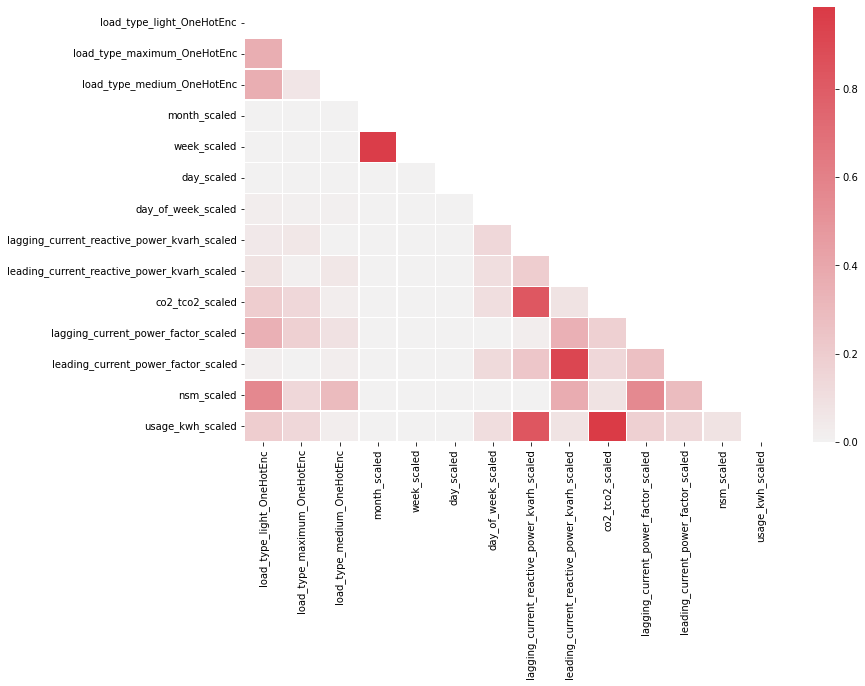

ATTENTION: The correlation plots show the linear correlations R², which go from 0 (none correlation) to 1 (perfect correlation). Obviously, the main diagonal always shows R² = 1, since the data is perfectly correlated to itself.

The returned correlation matrix, on the other hand, presents the linear coefficients of correlation R, not R². R values go from -1 (perfect negative correlation) to 1 (perfect positive correlation).

None of these coefficients take non-linear relations and the presence of a multiple linear correlation in account. For these cases, it is necessary to calculate R² adjusted, which takes in account the presence of multiple preditors and non-linearities.

Correlation matrix - numeric results:



,usage_kwh_scaled
usage_kwh_scaled,1.000000
co2_tco2_scaled,0.992540
lagging_current_reactive_power_kvarh_scaled,0.915152
lagging_current_power_factor_scaled,0.427834
load_type_maximum_OneHotEnc,0.378348
leading_current_power_factor_scaled,0.368415
nsm_scaled,0.286988
load_type_medium_OneHotEnc,0.163626
day_scaled,-0.047927
week_scaled,-0.053771


In [ ]:
DATASET = dataset #Alternatively: object containing the dataset to be analyzed

SHOW_MASKED_PLOT = True
#SHOW_MASKED_PLOT = True - keep as True if you want to see a cleaned version of the plot
# where a mask is applied. Alternatively, SHOW_MASKED_PLOT = True, or 
# SHOW_MASKED_PLOT = False

RESPONSES_TO_RETURN_CORR = 'usage_kwh_scaled'
#RESPONSES_TO_RETURN_CORR - keep as None to return the full correlation tensor.
# If you want to display the correlations for a particular group of features, input them
# as a list, even if this list contains a single element. Examples:
# responses_to_return_corr = ['response1'] for a single response
# responses_to_return_corr = ['response1', 'response2', 'response3'] for multiple
# responses. Notice that 'response1',... should be substituted by the name ('string')
# of a column of the dataset that represents a response variable.
# WARNING: The returned coefficients will be ordered according to the order of the list
# of responses. i.e., they will be firstly ordered based on 'response1'
# Alternatively: a list containing strings (inside quotes) with the names of the response
# columns that you want to see the correlations. Declare as a list even if it contains a
# single element.

SET_RETURNED_LIMIT = None
# SET_RETURNED_LIMIT = None - This variable will only present effects in case you have
# provided a response feature to be returned. In this case, keep set_returned_limit = None
# to return all of the correlation coefficients; or, alternatively, 
# provide an integer number to limit the total of coefficients returned. 
# e.g. if set_returned_limit = 10, only the ten highest coefficients will be returned. 

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.

DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""

FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'correlation_plot.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.

PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


#New dataframe saved as correlation_matrix. Simply modify this object on the left of equality:
correlation_matrix = ewf.correlation_plot (df = DATASET, show_masked_plot = SHOW_MASKED_PLOT, responses_to_return_corr = RESPONSES_TO_RETURN_CORR, set_returned_limit = SET_RETURNED_LIMIT, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

In [ ]:
boolean_filter = ((abs(correlation_matrix['usage_kwh_scaled']) >= 0.4) & (correlation_matrix['usage_kwh_scaled'] < 1))
correlation_matrix = correlation_matrix[boolean_filter]
correlation_matrix

,usage_kwh_scaled
co2_tco2_scaled,0.992540
lagging_current_reactive_power_kvarh_scaled,0.915152
lagging_current_power_factor_scaled,0.427834
load_type_light_OneHotEnc,-0.446068


# Since all have same order with magnitude, we can try plot them in the same scatter plot.

### **Obtaining scatter plots and simple linear regressions**

5 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



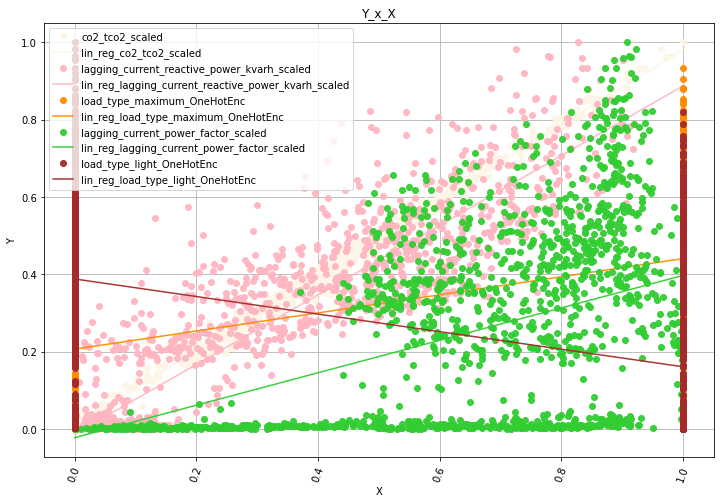


Linear regression summaries (equations and R²):

Linear regression summary for co2_tco2_scaled:



'y = 0.97*x + 0.01'

'R²_lin_reg = 0.9851'



Linear regression summary for lagging_current_reactive_power_kvarh_scaled:



'y = 0.90*x + -0.01'

'R²_lin_reg = 0.8375'



Linear regression summary for load_type_maximum_OneHotEnc:



'y = 0.23*x + 0.21'

'R²_lin_reg = 0.1431'



Linear regression summary for lagging_current_power_factor_scaled:



'y = 0.42*x + -0.02'

'R²_lin_reg = 0.1830'



Linear regression summary for load_type_light_OneHotEnc:



'y = -0.23*x + 0.39'

'R²_lin_reg = 0.1990'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x': dataset['co2_tco2_scaled'], 'y': dataset['usage_kwh_scaled'], 'lab': 'co2_tco2_scaled'}, 
    {'x': dataset['lagging_current_reactive_power_kvarh_scaled'], 'y': dataset['usage_kwh_scaled'], 'lab': 'lagging_current_reactive_power_kvarh_scaled'}, 
    {'x': dataset['load_type_maximum_OneHotEnc'], 'y': dataset['usage_kwh_scaled'], 'lab': 'load_type_maximum_OneHotEnc'}, 
    {'x': dataset['lagging_current_power_factor_scaled'], 'y': dataset['usage_kwh_scaled'], 'lab': 'lagging_current_power_factor_scaled'}, 
    {'x':dataset['load_type_light_OneHotEnc'], 'y': dataset['usage_kwh_scaled'], 'lab': 'load_type_light_OneHotEnc'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

1 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



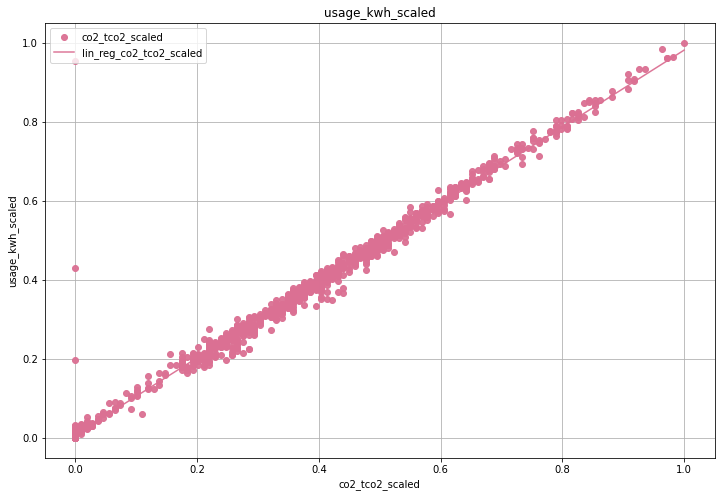


Linear regression summaries (equations and R²):

Linear regression summary for co2_tco2_scaled:



'y = 0.97*x + 0.01'

'R²_lin_reg = 0.9851'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x': dataset['co2_tco2_scaled'], 'y': dataset['usage_kwh_scaled'], 'lab': 'co2_tco2_scaled'}, 
    #{'x': dataset['lagging_current_reactive_power_kvarh_scaled'], 'y': dataset['usage_kwh_scaled'], 'lab': 'lagging_current_reactive_power_kvarh_scaled'}, 
    #{'x': dataset['load_type_maximum_OneHotEnc'], 'y': dataset['usage_kwh_scaled'], 'lab': 'load_type_maximum_OneHotEnc'}, 
    #{'x': dataset['lagging_current_power_factor_scaled'], 'y': dataset['usage_kwh_scaled'], 'lab': 'lagging_current_power_factor_scaled'}, 
    #{'x':dataset['load_type_light_OneHotEnc'], 'y': dataset['usage_kwh_scaled'], 'lab': 'load_type_light_OneHotEnc'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = 'co2_tco2_scaled' #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'usage_kwh_scaled' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'usage_kwh_scaled' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

1 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



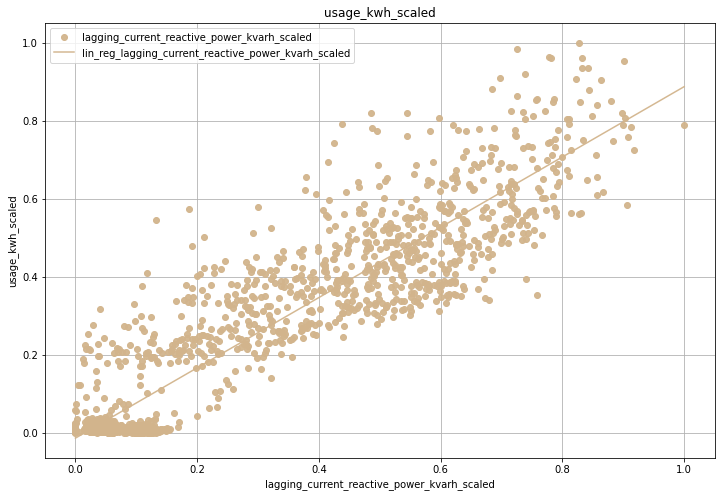


Linear regression summaries (equations and R²):

Linear regression summary for lagging_current_reactive_power_kvarh_scaled:



'y = 0.90*x + -0.01'

'R²_lin_reg = 0.8375'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    #{'x': dataset['co2_tco2_scaled'], 'y': dataset['usage_kwh_scaled'], 'lab': 'co2_tco2_scaled'}, 
    {'x': dataset['lagging_current_reactive_power_kvarh_scaled'], 'y': dataset['usage_kwh_scaled'], 'lab': 'lagging_current_reactive_power_kvarh_scaled'}, 
    #{'x': dataset['load_type_maximum_OneHotEnc'], 'y': dataset['usage_kwh_scaled'], 'lab': 'load_type_maximum_OneHotEnc'}, 
    #{'x': dataset['lagging_current_power_factor_scaled'], 'y': dataset['usage_kwh_scaled'], 'lab': 'lagging_current_power_factor_scaled'}, 
    #{'x':dataset['load_type_light_OneHotEnc'], 'y': dataset['usage_kwh_scaled'], 'lab': 'load_type_light_OneHotEnc'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = 'lagging_current_reactive_power_kvarh_scaled' #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'usage_kwh_scaled' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'usage_kwh_scaled' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

1 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



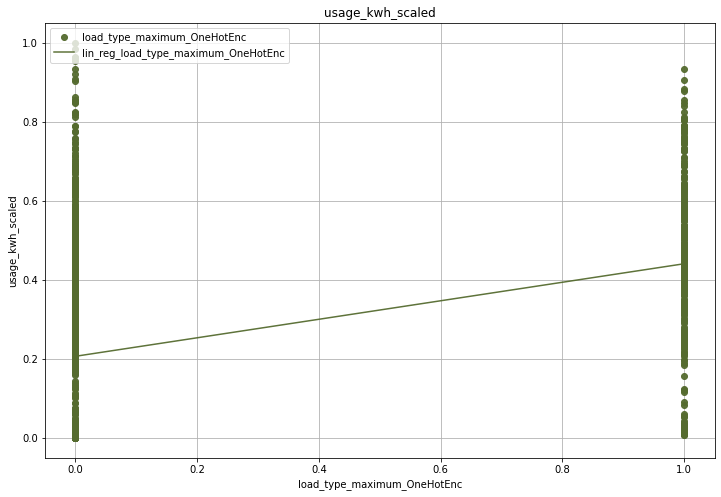


Linear regression summaries (equations and R²):

Linear regression summary for load_type_maximum_OneHotEnc:



'y = 0.23*x + 0.21'

'R²_lin_reg = 0.1431'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    #{'x': dataset['co2_tco2_scaled'], 'y': dataset['usage_kwh_scaled'], 'lab': 'co2_tco2_scaled'}, 
    #{'x': dataset['lagging_current_reactive_power_kvarh_scaled'], 'y': dataset['usage_kwh_scaled'], 'lab': 'lagging_current_reactive_power_kvarh_scaled'}, 
    {'x': dataset['load_type_maximum_OneHotEnc'], 'y': dataset['usage_kwh_scaled'], 'lab': 'load_type_maximum_OneHotEnc'}, 
    #{'x': dataset['lagging_current_power_factor_scaled'], 'y': dataset['usage_kwh_scaled'], 'lab': 'lagging_current_power_factor_scaled'}, 
    #{'x':dataset['load_type_light_OneHotEnc'], 'y': dataset['usage_kwh_scaled'], 'lab': 'load_type_light_OneHotEnc'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = 'load_type_maximum_OneHotEnc' #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'usage_kwh_scaled' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'usage_kwh_scaled' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

1 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



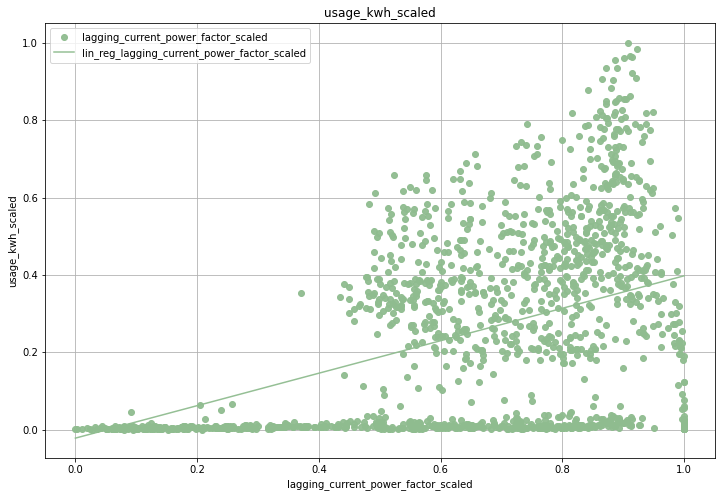


Linear regression summaries (equations and R²):

Linear regression summary for lagging_current_power_factor_scaled:



'y = 0.42*x + -0.02'

'R²_lin_reg = 0.1830'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    #{'x': dataset['co2_tco2_scaled'], 'y': dataset['usage_kwh_scaled'], 'lab': 'co2_tco2_scaled'}, 
    #{'x': dataset['lagging_current_reactive_power_kvarh_scaled'], 'y': dataset['usage_kwh_scaled'], 'lab': 'lagging_current_reactive_power_kvarh_scaled'}, 
    #{'x': dataset['load_type_maximum_OneHotEnc'], 'y': dataset['usage_kwh_scaled'], 'lab': 'load_type_maximum_OneHotEnc'}, 
    {'x': dataset['lagging_current_power_factor_scaled'], 'y': dataset['usage_kwh_scaled'], 'lab': 'lagging_current_power_factor_scaled'}, 
    #{'x':dataset['load_type_light_OneHotEnc'], 'y': dataset['usage_kwh_scaled'], 'lab': 'load_type_light_OneHotEnc'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = 'lagging_current_power_factor_scaled' #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'usage_kwh_scaled' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'usage_kwh_scaled' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

1 valid series input.

Returning a list of dictionaries. Each one contains the arrays of valid series and labels, and the equations, R² and values predicted by the linear regressions.



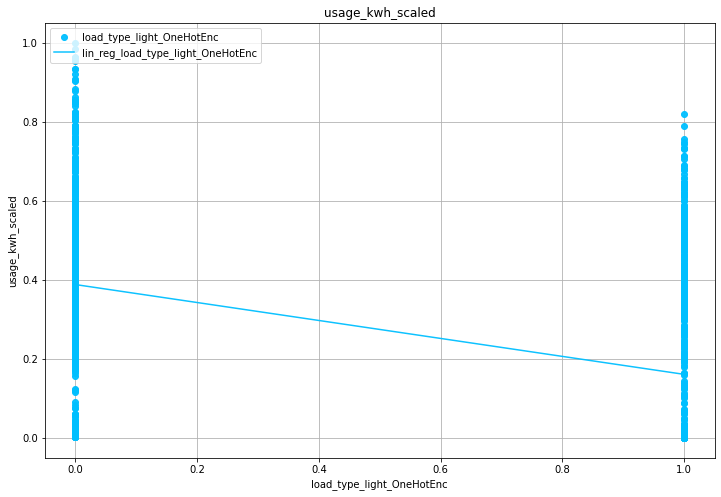


Linear regression summaries (equations and R²):

Linear regression summary for load_type_light_OneHotEnc:



'y = -0.23*x + 0.39'

'R²_lin_reg = 0.1990'

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    #{'x': dataset['co2_tco2_scaled'], 'y': dataset['usage_kwh_scaled'], 'lab': 'co2_tco2_scaled'}, 
    #{'x': dataset['lagging_current_reactive_power_kvarh_scaled'], 'y': dataset['usage_kwh_scaled'], 'lab': 'lagging_current_reactive_power_kvarh_scaled'}, 
    #{'x': dataset['load_type_maximum_OneHotEnc'], 'y': dataset['usage_kwh_scaled'], 'lab': 'load_type_maximum_OneHotEnc'}, 
    #{'x': dataset['lagging_current_power_factor_scaled'], 'y': dataset['usage_kwh_scaled'], 'lab': 'lagging_current_power_factor_scaled'}, 
    {'x':dataset['load_type_light_OneHotEnc'], 'y': dataset['usage_kwh_scaled'], 'lab': 'load_type_light_OneHotEnc'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).

SHOW_LINEAR_REG = True
#Alternatively: set SHOW_LINEAR_REG = True to plot the linear regressions graphics and show 
# the linear regressions calculated for each pair Y x X (i.e., each correlation 
# Y = aX + b, as well as the R² coefficient calculated). 
# Set SHOW_LINEAR_REG = False to omit both the linear regressions plots on the graphic, and
# the correlations and R² coefficients obtained.

GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = False #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
HORIZONTAL_AXIS_TITLE = 'load_type_light_OneHotEnc' #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = 'usage_kwh_scaled' #Alternatively: string inside quotes for vertical title
PLOT_TITLE = 'usage_kwh_scaled' #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'scatter_plot_lin_reg.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


# JSON-formatted list containing all series converted to NumPy arrays, 
#  with timestamps parsed as datetimes, and all the information regarding the linear regressions, 
# including the predicted values for plotting, returned as list_of_dictionaries_with_series_and_predictions. 
# Simply modify this object on the left of equality:
list_of_dictionaries_with_series_and_predictions = ewf.scatter_plot_lin_reg (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, show_linear_reg = SHOW_LINEAR_REG, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### **Visualizing time series**

In [ ]:
dataset.columns

Index(['timestamp', 'load_type_light_OneHotEnc', 'load_type_maximum_OneHotEnc',
       'load_type_medium_OneHotEnc', 'month_scaled', 'week_scaled',
       'day_scaled', 'day_of_week_scaled',
       'lagging_current_reactive_power_kvarh_scaled',
       'leading_current_reactive_power_kvarh_scaled', 'co2_tco2_scaled',
       'lagging_current_power_factor_scaled',
       'leading_current_power_factor_scaled', 'nsm_scaled',
       'usage_kwh_scaled'],
      dtype='object')

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



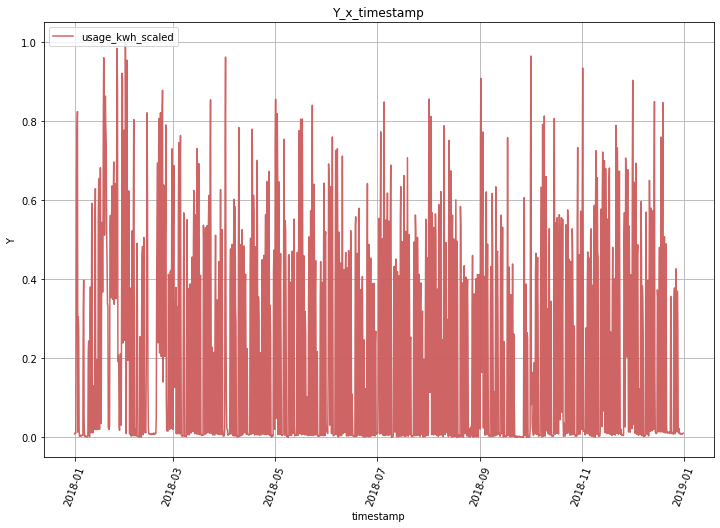

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x':dataset['timestamp'], 'y': dataset['usage_kwh_scaled'], 'lab': 'usage_kwh_scaled'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



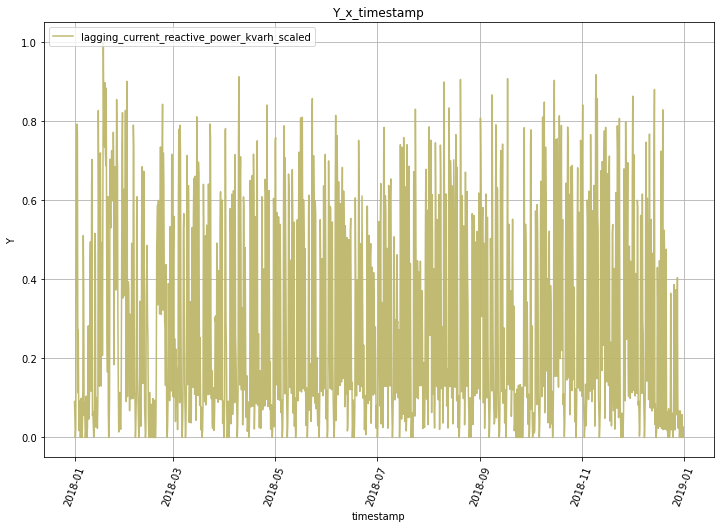

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x':dataset['timestamp'], 'y': dataset['lagging_current_reactive_power_kvarh_scaled'], 'lab': 'lagging_current_reactive_power_kvarh_scaled'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



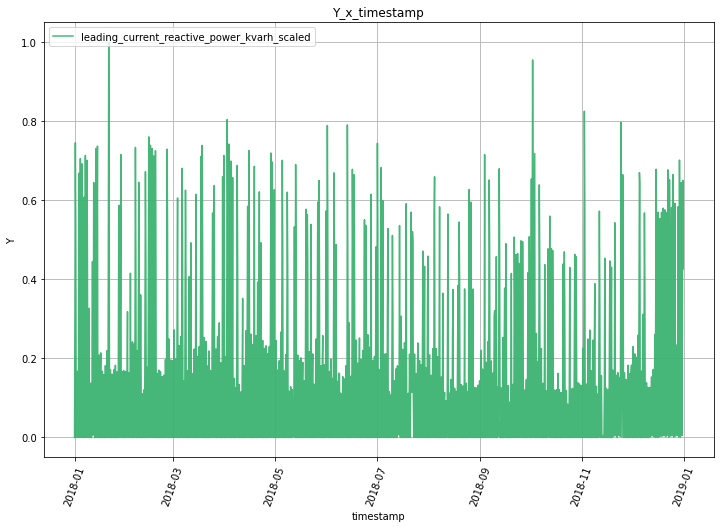

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x':dataset['timestamp'], 'y': dataset['leading_current_reactive_power_kvarh_scaled'], 'lab': 'leading_current_reactive_power_kvarh_scaled'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



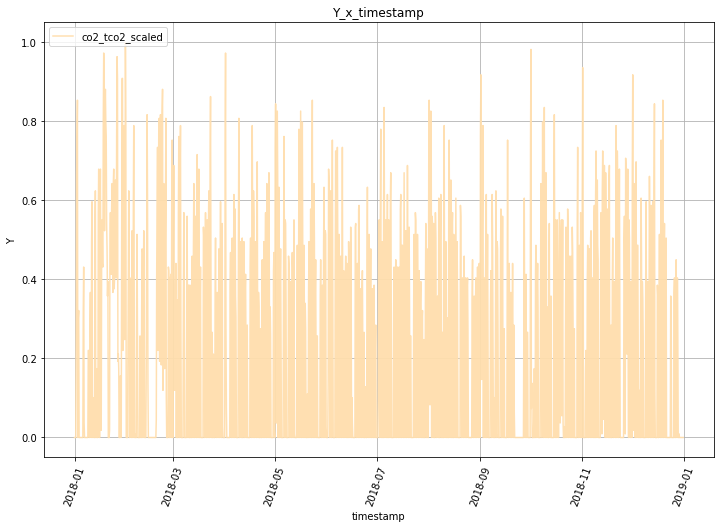

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x':dataset['timestamp'], 'y': dataset['co2_tco2_scaled'], 'lab': 'co2_tco2_scaled'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



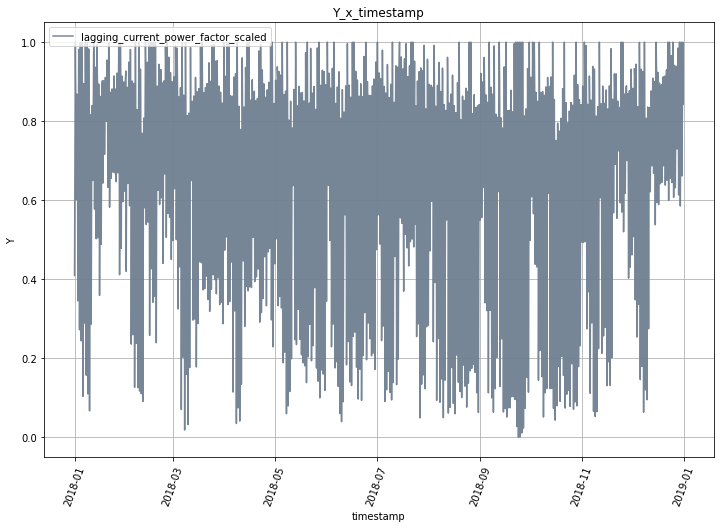

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x':dataset['timestamp'], 'y': dataset['lagging_current_power_factor_scaled'], 'lab': 'lagging_current_power_factor_scaled'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



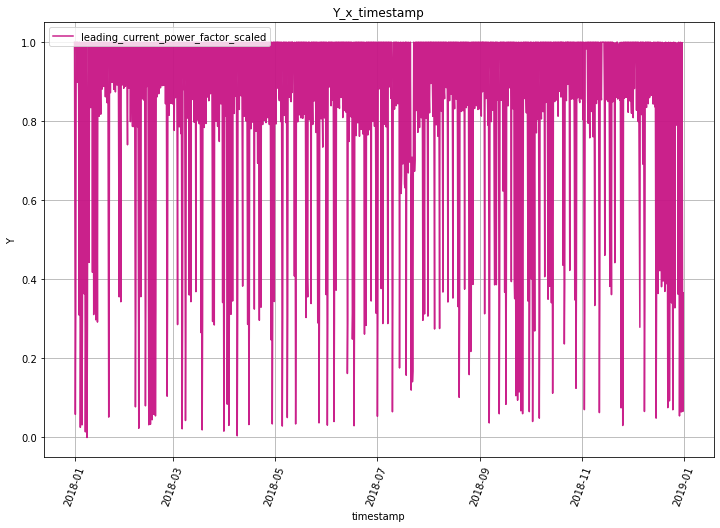

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x':dataset['timestamp'], 'y': dataset['leading_current_power_factor_scaled'], 'lab': 'leading_current_power_factor_scaled'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

Variable X from 0-th dictionary successfully converted to datetime64[ns].

1 valid series input.



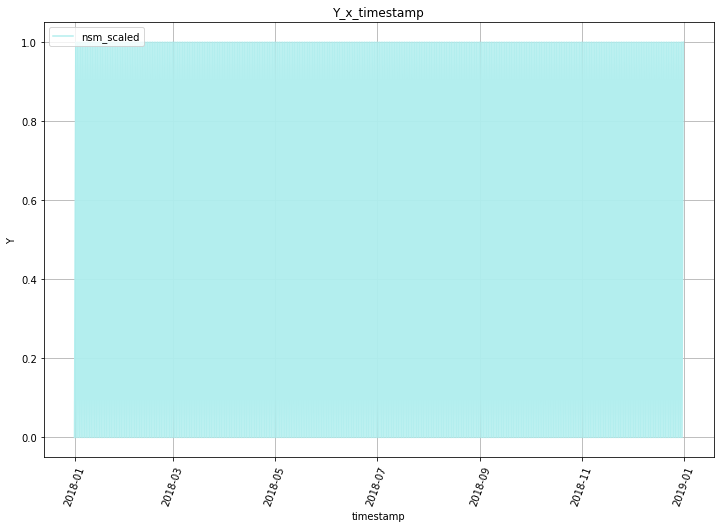

In [ ]:
DATA_IN_SAME_COLUMN = False

# Parameters to input when DATA_IN_SAME_COLUMN = True:
DATASET = None #Alternatively: object containing the dataset to be analyzed (e.g. DATASET = dataset)
COLUMN_WITH_PREDICT_VAR_X = 'X' # Alternatively: correct name for X-column
COLUMN_WITH_RESPONSE_VAR_Y = 'Y' # Alternatively: correct name for Y-column
COLUMN_WITH_LABELS = 'label_column' # Alternatively: correct name for column with the labels or groups

# DATA_IN_SAME_COLUMN = False: set as True if all the values to plot are in a same column.
# If DATA_IN_SAME_COLUMN = True, you must specify the dataframe containing the data as DATASET;
# the column containing the predict variable (X) as COLUMN_WITH_PREDICT_VAR_X; the column 
# containing the responses to plot (Y) as COLUMN_WITH_RESPONSE_VAR_Y; and the column 
# containing the labels (subgroup) indication as COLUMN_WITH_LABELS. 
# DATASET is an object, so do not declare it in quotes. The other three arguments (columns' names) 
# are strings, so declare in quotes. 

# Example: suppose you have a dataframe saved as dataset, and two groups A and B to compare. 
# All the results for both groups are in a column named 'results', wich will be plot against
# the time, saved as 'time' (X = 'time'; Y = 'results'). If the result is for
# an entry from group A, then a column named 'group' has the value 'A'. If it is for group B,
# column 'group' shows the value 'B'. In this example:
# DATA_IN_SAME_COLUMN = True,
# DATASET = dataset,
# COLUMN_WITH_PREDICT_VAR_X = 'time',
# COLUMN_WITH_RESPONSE_VAR_Y = 'results', 
# COLUMN_WITH_LABELS = 'group'
# If you want to declare a list of dictionaries, keep DATA_IN_SAME_COLUMN = False and keep
# DATASET = None (the other arguments may be set as None, but it is not mandatory: 
# COLUMN_WITH_PREDICT_VAR_X = None, COLUMN_WITH_RESPONSE_VAR_Y = None, COLUMN_WITH_LABELS = None).


# Parameter to input when DATA_IN_SAME_COLUMN = False:
LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = [
    
    {'x':dataset['timestamp'], 'y': dataset['nsm_scaled'], 'lab': 'nsm_scaled'}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}, 
    {'x': None, 'y': None, 'lab': None}
    
]
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE: if data is already converted to series, lists
# or arrays, provide them as a list of dictionaries. It must be declared as a list, in brackets,
# even if there is a single dictionary.
# Use always the same keys: 'x' for the X-series (predict variables); 'y' for the Y-series
# (response variables); and 'lab' for the labels. If you do not want to declare a series, simply
# keep as None, but do not remove or rename a key (ALWAYS USE THE KEYS SHOWN AS MODEL).
# If you want, you can remove elements (dictionaries) from the list to declare fewer elements;
# and you can also add more elements (dictionaries) to the lists, if you need to plot more series.
# Simply put a comma after the last element from the list and declare a new dictionary, keeping the
# same keys: {'x': x_series, 'y': y_series, 'lab': label}, where x_series, y_series and label
# represents the series and label of the added dictionary (you can pass 'lab': None, but if 
# 'x' or 'y' are None, the new dictionary will be ignored).

# Examples:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y'], 'lab': 'label'}]
# will plot a single variable. In turns:
# LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE = 
# [{'x': DATASET['X'], 'y': DATASET['Y1'], 'lab': 'label'}, {'x': DATASET['X'], 'y': DATASET['Y2'], 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}, {'x': None, 'y': None, 'lab': None}]
# will plot two series, Y1 x X and Y2 x X.
# Notice that all dictionaries where 'x' or 'y' are None are automatically ignored.
# If None is provided to 'lab', an automatic label will be generated.


X_AXIS_ROTATION = 70
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
ADD_SPLINE_LINES = True #Alternatively: True or False
# If ADD_SPLINE_LINES = False, no lines connecting the successive values are shown.
# Since we are obtaining a scatter plot, there is no meaning in omitting the dots,
# as we can do for the time series visualization function.
ADD_SCATTER_DOTS = False
# If ADD_SCATTER_DOTS = False, no dots representing the data points are shown.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'time_series_vis.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.


ewf.time_series_vis (data_in_same_column = DATA_IN_SAME_COLUMN, df = DATASET, column_with_predict_var_x = COLUMN_WITH_PREDICT_VAR_X, column_with_response_var_y = COLUMN_WITH_RESPONSE_VAR_Y, column_with_labels = COLUMN_WITH_LABELS, list_of_dictionaries_with_series_to_analyze = LIST_OF_DICTIONARIES_WITH_SERIES_TO_ANALYZE, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, add_splines_lines = ADD_SPLINE_LINES, add_scatter_dots = ADD_SCATTER_DOTS, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

### **Visualizing histograms**


Ideal number of histogram bins calculated through Montgomery's method = 38 bins.



<Figure size 432x288 with 0 Axes>

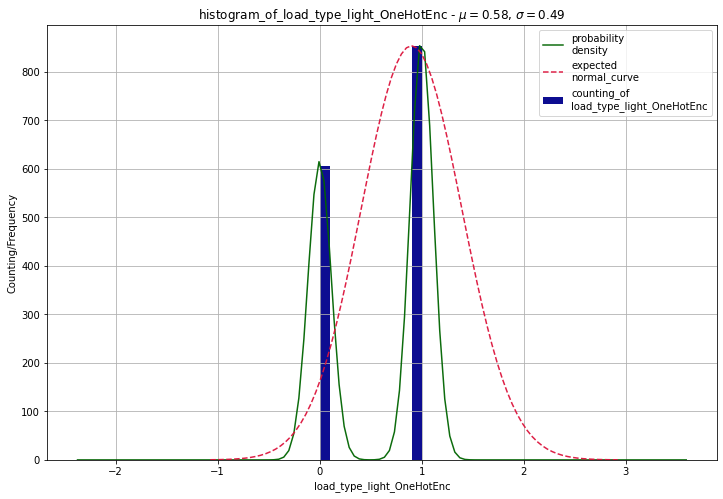

Check the general statistics from the analyzed variable:



,value
statistics,
mean,0.584932
median,1.000000
standard_deviation,0.492903
lowest_load_type_light_OneHotEnc,0.000000
highest_load_type_light_OneHotEnc,1.000000
count_of_values,1460.000000
number_of_bins,11.000000
bin_size,0.100000
bin_of_max_proba,0.900000




Check the frequency table:



,bin_center,count
0,0.0,606.0
1,0.1,0.0
2,0.2,0.0
3,0.3,0.0
4,0.4,0.0
5,0.5,0.0
6,0.6,0.0
7,0.7,0.0
8,0.8,0.0
9,0.9,854.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'load_type_light_OneHotEnc'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 10
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 38 bins.



<Figure size 432x288 with 0 Axes>

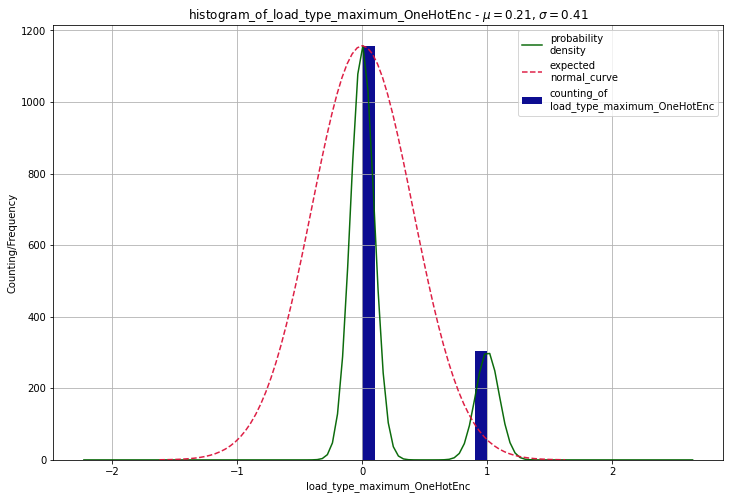

Check the general statistics from the analyzed variable:



,value
statistics,
mean,0.207534
median,0.000000
standard_deviation,0.405680
lowest_load_type_maximum_OneHotEnc,0.000000
highest_load_type_maximum_OneHotEnc,1.000000
count_of_values,1460.000000
number_of_bins,11.000000
bin_size,0.100000
bin_of_max_proba,0.000000




Check the frequency table:



,bin_center,count
0,0.0,1157.0
1,0.1,0.0
2,0.2,0.0
3,0.3,0.0
4,0.4,0.0
5,0.5,0.0
6,0.6,0.0
7,0.7,0.0
8,0.8,0.0
9,0.9,303.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'load_type_maximum_OneHotEnc'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 10
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 38 bins.



<Figure size 432x288 with 0 Axes>

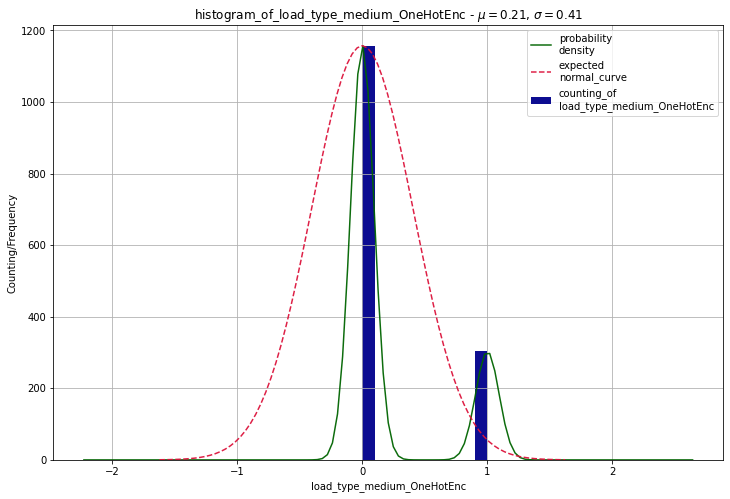

Check the general statistics from the analyzed variable:



,value
statistics,
mean,0.207534
median,0.000000
standard_deviation,0.405680
lowest_load_type_medium_OneHotEnc,0.000000
highest_load_type_medium_OneHotEnc,1.000000
count_of_values,1460.000000
number_of_bins,11.000000
bin_size,0.100000
bin_of_max_proba,0.000000




Check the frequency table:



,bin_center,count
0,0.0,1157.0
1,0.1,0.0
2,0.2,0.0
3,0.3,0.0
4,0.4,0.0
5,0.5,0.0
6,0.6,0.0
7,0.7,0.0
8,0.8,0.0
9,0.9,303.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'load_type_medium_OneHotEnc'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 10
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 38 bins.



<Figure size 432x288 with 0 Axes>

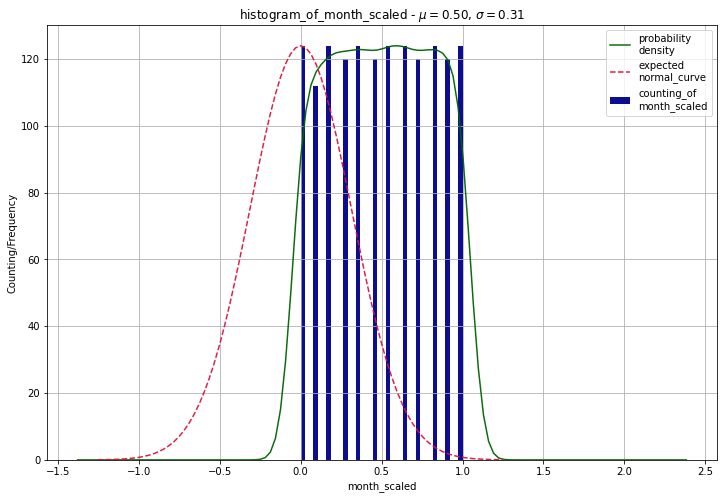

Check the general statistics from the analyzed variable:



,value
statistics,
mean,0.502366
median,0.545455
standard_deviation,0.313548
lowest_month_scaled,0.000000
highest_month_scaled,1.000000
count_of_values,1460.000000
number_of_bins,39.000000
bin_size,0.026316
bin_of_max_proba,0.000000




Check the frequency table:



,bin_center,count
0,0.000000,124.0
1,0.026316,0.0
2,0.052632,0.0
3,0.078947,112.0
4,0.105263,0.0
5,0.131579,0.0
6,0.157895,124.0
7,0.184211,0.0
8,0.210526,0.0
9,0.236842,0.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'month_scaled'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 38
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 38 bins.



<Figure size 432x288 with 0 Axes>

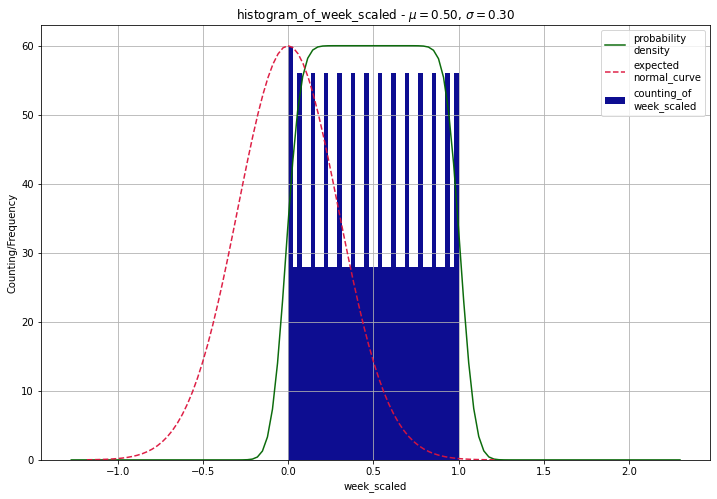

Check the general statistics from the analyzed variable:



,value
statistics,
mean,0.498630
median,0.490196
standard_deviation,0.295139
lowest_week_scaled,0.000000
highest_week_scaled,1.000000
count_of_values,1460.000000
number_of_bins,39.000000
bin_size,0.026316
bin_of_max_proba,0.000000




Check the frequency table:



,bin_center,count
0,0.000000,60.0
1,0.026316,28.0
2,0.052632,56.0
3,0.078947,28.0
4,0.105263,28.0
5,0.131579,56.0
6,0.157895,28.0
7,0.184211,28.0
8,0.210526,56.0
9,0.236842,28.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'week_scaled'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 38
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 38 bins.



<Figure size 432x288 with 0 Axes>

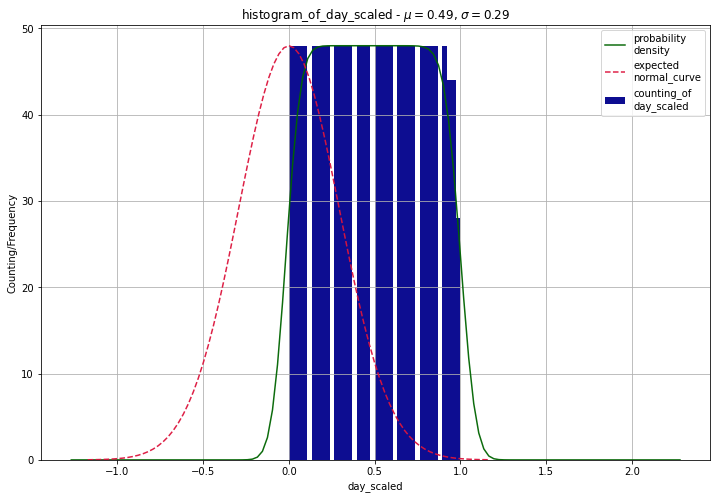

Check the general statistics from the analyzed variable:



,value
statistics,
mean,0.490685
median,0.500000
standard_deviation,0.293309
lowest_day_scaled,0.000000
highest_day_scaled,1.000000
count_of_values,1460.000000
number_of_bins,39.000000
bin_size,0.026316
bin_of_max_proba,0.000000




Check the frequency table:



,bin_center,count
0,0.000000,48.0
1,0.026316,48.0
2,0.052632,48.0
3,0.078947,48.0
4,0.105263,0.0
5,0.131579,48.0
6,0.157895,48.0
7,0.184211,48.0
8,0.210526,48.0
9,0.236842,0.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'day_scaled'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 38
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 38 bins.



<Figure size 432x288 with 0 Axes>

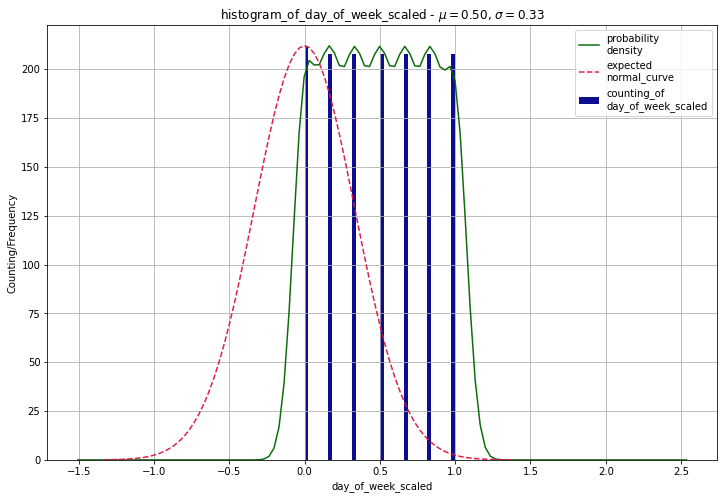

Check the general statistics from the analyzed variable:



,value
statistics,
mean,0.498630
median,0.500000
standard_deviation,0.334015
lowest_day_of_week_scaled,0.000000
highest_day_of_week_scaled,1.000000
count_of_values,1460.000000
number_of_bins,39.000000
bin_size,0.026316
bin_of_max_proba,0.000000




Check the frequency table:



,bin_center,count
0,0.000000,212.0
1,0.026316,0.0
2,0.052632,0.0
3,0.078947,0.0
4,0.105263,0.0
5,0.131579,0.0
6,0.157895,208.0
7,0.184211,0.0
8,0.210526,0.0
9,0.236842,0.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'day_of_week_scaled'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 38
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 38 bins.



<Figure size 432x288 with 0 Axes>

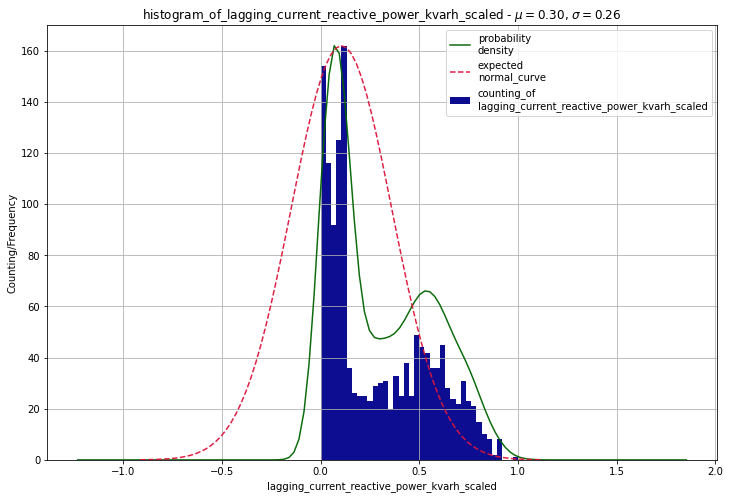

Check the general statistics from the analyzed variable:



,value
statistics,
mean,0.298216
median,0.205801
standard_deviation,0.255041
lowest_lagging_current_reactive_power_kvarh_scaled,0.000000
highest_lagging_current_reactive_power_kvarh_scaled,1.000000
count_of_values,1460.000000
number_of_bins,39.000000
bin_size,0.026316
bin_of_max_proba,0.105263




Check the frequency table:



,bin_center,count
0,0.000000,154.0
1,0.026316,116.0
2,0.052632,92.0
3,0.078947,125.0
4,0.105263,162.0
5,0.131579,36.0
6,0.157895,26.0
7,0.184211,25.0
8,0.210526,25.0
9,0.236842,23.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'lagging_current_reactive_power_kvarh_scaled'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 38
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 38 bins.



<Figure size 432x288 with 0 Axes>

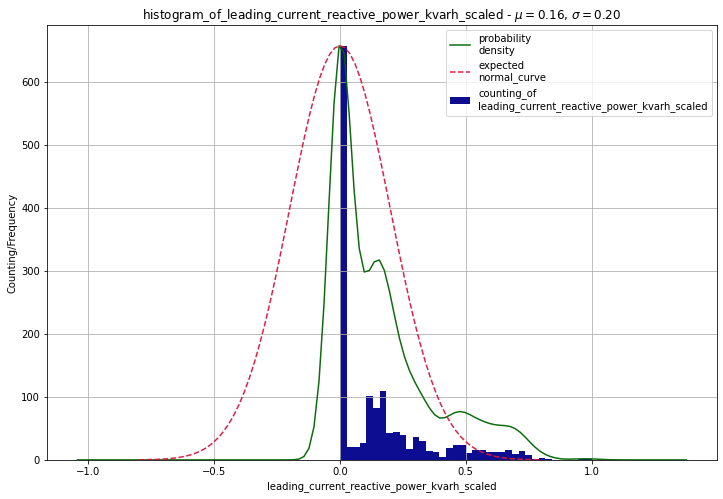

Check the general statistics from the analyzed variable:



,value
statistics,
mean,0.156571
median,0.107262
standard_deviation,0.199985
lowest_leading_current_reactive_power_kvarh_scaled,0.000000
highest_leading_current_reactive_power_kvarh_scaled,1.000000
count_of_values,1460.000000
number_of_bins,39.000000
bin_size,0.026316
bin_of_max_proba,0.000000




Check the frequency table:



,bin_center,count
0,0.000000,657.0
1,0.026316,21.0
2,0.052632,20.0
3,0.078947,27.0
4,0.105263,102.0
5,0.131579,82.0
6,0.157895,110.0
7,0.184211,43.0
8,0.210526,45.0
9,0.236842,40.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'leading_current_reactive_power_kvarh_scaled'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 38
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 38 bins.



<Figure size 432x288 with 0 Axes>

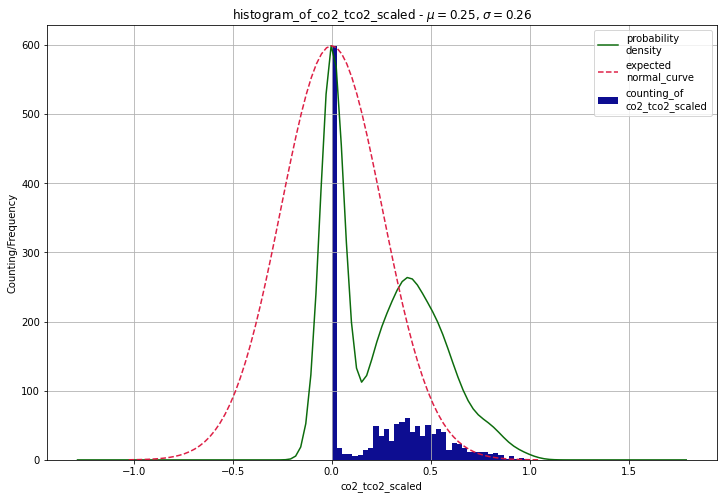

Check the general statistics from the analyzed variable:



,value
statistics,
mean,0.253745
median,0.238532
standard_deviation,0.256082
lowest_co2_tco2_scaled,0.000000
highest_co2_tco2_scaled,1.000000
count_of_values,1460.000000
number_of_bins,39.000000
bin_size,0.026316
bin_of_max_proba,0.000000




Check the frequency table:



,bin_center,count
0,0.000000,599.0
1,0.026316,17.0
2,0.052632,9.0
3,0.078947,9.0
4,0.105263,6.0
5,0.131579,7.0
6,0.157895,15.0
7,0.184211,17.0
8,0.210526,49.0
9,0.236842,34.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'co2_tco2_scaled'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 38
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 38 bins.



<Figure size 432x288 with 0 Axes>

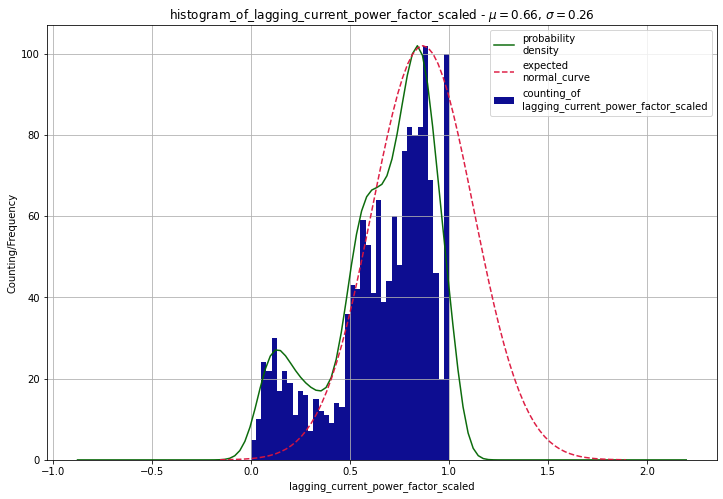

Check the general statistics from the analyzed variable:



,value
statistics,
mean,0.661358
median,0.726614
standard_deviation,0.255894
lowest_lagging_current_power_factor_scaled,0.000000
highest_lagging_current_power_factor_scaled,1.000000
count_of_values,1460.000000
number_of_bins,39.000000
bin_size,0.026316
bin_of_max_proba,0.868421




Check the frequency table:



,bin_center,count
0,0.000000,5.0
1,0.026316,10.0
2,0.052632,24.0
3,0.078947,22.0
4,0.105263,30.0
5,0.131579,17.0
6,0.157895,22.0
7,0.184211,19.0
8,0.210526,11.0
9,0.236842,17.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'lagging_current_power_factor_scaled'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 38
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 38 bins.



<Figure size 432x288 with 0 Axes>

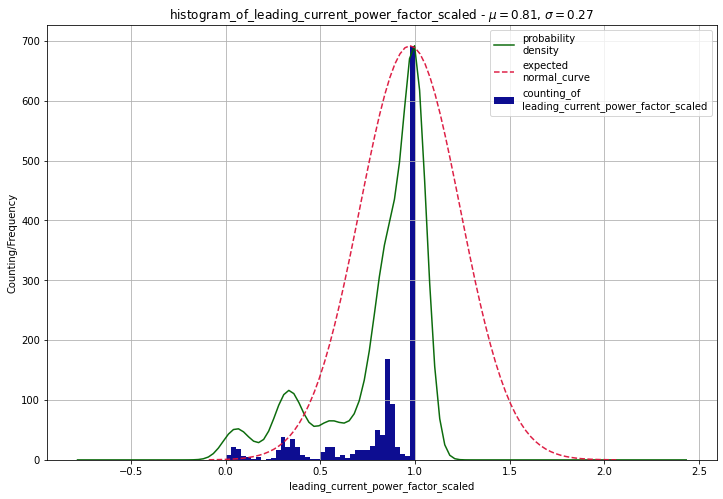

Check the general statistics from the analyzed variable:



,value
statistics,
mean,0.811848
median,0.894184
standard_deviation,0.265846
lowest_leading_current_power_factor_scaled,0.000000
highest_leading_current_power_factor_scaled,1.000000
count_of_values,1460.000000
number_of_bins,39.000000
bin_size,0.026316
bin_of_max_proba,0.973684




Check the frequency table:



,bin_center,count
0,0.000000,8.0
1,0.026316,21.0
2,0.052632,19.0
3,0.078947,7.0
4,0.105263,5.0
5,0.131579,2.0
6,0.157895,4.0
7,0.184211,0.0
8,0.210526,2.0
9,0.236842,3.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'leading_current_power_factor_scaled'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 38
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 38 bins.



<Figure size 432x288 with 0 Axes>

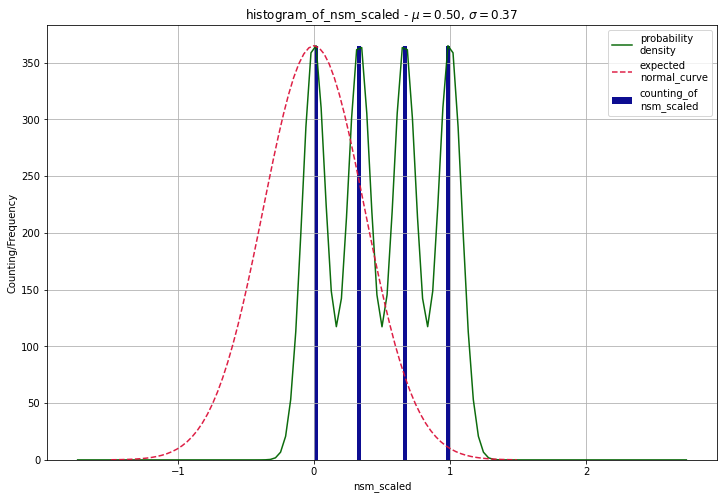

Check the general statistics from the analyzed variable:



,value
statistics,
mean,0.500000
median,0.500000
standard_deviation,0.372806
lowest_nsm_scaled,0.000000
highest_nsm_scaled,1.000000
count_of_values,1460.000000
number_of_bins,39.000000
bin_size,0.026316
bin_of_max_proba,0.000000




Check the frequency table:



,bin_center,count
0,0.000000,365.0
1,0.026316,0.0
2,0.052632,0.0
3,0.078947,0.0
4,0.105263,0.0
5,0.131579,0.0
6,0.157895,0.0
7,0.184211,0.0
8,0.210526,0.0
9,0.236842,0.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'nsm_scaled'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 38
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)


Ideal number of histogram bins calculated through Montgomery's method = 38 bins.



<Figure size 432x288 with 0 Axes>

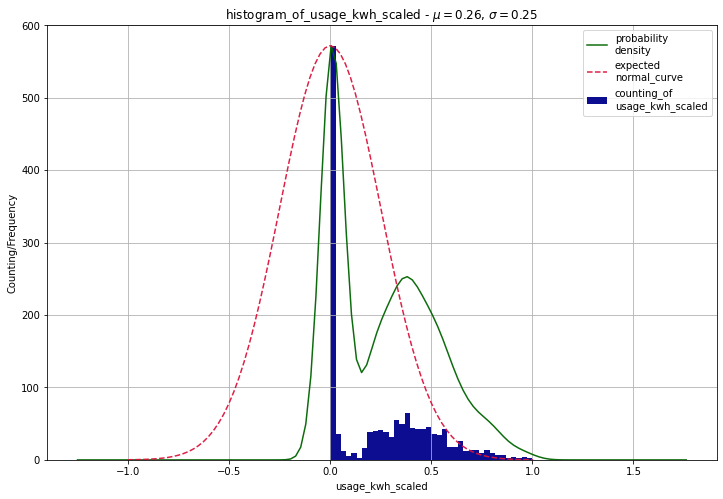

Check the general statistics from the analyzed variable:



,value
statistics,
mean,0.255577
median,0.234377
standard_deviation,0.250974
lowest_usage_kwh_scaled,0.000000
highest_usage_kwh_scaled,1.000000
count_of_values,1460.000000
number_of_bins,39.000000
bin_size,0.026316
bin_of_max_proba,0.000000




Check the frequency table:



,bin_center,count
0,0.000000,572.0
1,0.026316,36.0
2,0.052632,12.0
3,0.078947,5.0
4,0.105263,10.0
5,0.131579,3.0
6,0.157895,16.0
7,0.184211,38.0
8,0.210526,40.0
9,0.236842,41.0


In [ ]:
# REMEMBER: A histogram is the representation of a statistical distribution 
# of a given variable.

DATASET = dataset #Alternatively: object containing the dataset to be analyzed

COLUMN_TO_ANALYZE = 'usage_kwh_scaled'
#Alternatively: other column in quotes, substituting 'analyzed_variable'
# e.g., if the analyzed variable is in a column named 'column1':
# COLUMN_TO_ANALYZE = 'column1'

TOTAL_OF_BINS = 38
# This parameter must be an integer number: it represents the total of bins of the 
# histogram, i.e., the number of divisions of the sample space (in how much intervals
# the sample space will be divided.
# Manually adjust this parameter to obtain more or less resolution of the statistical
# distribution: less bins tend to result into higher counting of values per bin, since
# a larger interval of values is grouped. After modifying the total of bins, do not forget
# to adjust the bar width in SET_GRAPHIC_BAR_WIDTH.
# Examples: TOTAL_OF_BINS = 50, to divide the sample space into 50 equally-separated 
# intervals; TOTAL_OF_BINS = 10 to divide it into 10 intervals; TOTAL_OF_BINS = 100 to
# divide it into 100 intervals.
NORMAL_CURVE_OVERLAY = True
#Alternatively: set NORMAL_CURVE_OVERLAY = True to show a normal curve overlaying the
# histogram; or set NORMAL_CURVE_OVERLAY = False to omit the normal curve (show only
# the histogram).

X_AXIS_ROTATION = 0
#Rotation of X axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
Y_AXIS_ROTATION = 0
#Rotation of Y axis labels. Alternatively, insert any numeric value from 0 to 90 (degrees).
GRID = True #Alternatively: True or False
# If GRID = False, no grid lines are shown in the graphic.
HORIZONTAL_AXIS_TITLE = None #Alternatively: string inside quotes for horizontal title
VERTICAL_AXIS_TITLE = None #Alternatively: string inside quotes for vertical title
PLOT_TITLE = None #Alternatively: string inside quotes for graphic title
# e.g. HORIZONTAL_AXIS_TITLE = "X", VERTICAL_AXIS_TITLE = "Y", PLOT_TITLE = "YxX"

EXPORT_PNG = False
# Set EXPORT_PNG = False if you do not want to export the obtained image;
# Set EXPORT_PNG = True to export the obtained image.
DIRECTORY_TO_SAVE = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file will be stored. e.g. DIRECTORY_TO_SAVE = "" 
# or DIRECTORY_TO_SAVE = "folder"
# If EXPORT_PNG = True and DIRECTORY_TO_SAVE = None, the file will be saved in the root
# path, DIRECTORY_TO_SAVE = ""
FILE_NAME = None
# This parameter has effect only if EXPORT_PNG = True.
# (string, in quotes): input the name you want for the file without the 
# extension, which will be 'png'. e.g. FILE_NAME = "my_image" will save a file 'my_image.png' 
# If EXPORT_PNG = True and FILE_NAME = None, the file will be saved as:
# 'histogram.png'
# WARNING: if there is already a file in the path DIRECTORY_TO_SAVE saved as FILE_NAME,
# the file will be overwritten.
PNG_RESOLUTION_DPI = 330
# This parameter has effect only if EXPORT_PNG = True.
# Alternatively, input an integer that will correspond to the resolution of the exported
# image in dpi. If PNG_RESOLUTION_DPI = None, it will be set as 330.

#New dataframes saved as general_stats and frequency_table.
# Simply modify these objects on the left of equality:
general_stats, frequency_table = ewf.histogram (df = DATASET, column_to_analyze = COLUMN_TO_ANALYZE, total_of_bins = TOTAL_OF_BINS, normal_curve_overlay = NORMAL_CURVE_OVERLAY, x_axis_rotation = X_AXIS_ROTATION, y_axis_rotation = Y_AXIS_ROTATION, grid = GRID, horizontal_axis_title = HORIZONTAL_AXIS_TITLE, vertical_axis_title = VERTICAL_AXIS_TITLE, plot_title = PLOT_TITLE, export_png = EXPORT_PNG, directory_to_save = DIRECTORY_TO_SAVE, file_name = FILE_NAME, png_resolution_dpi = PNG_RESOLUTION_DPI)

## **Exporting the dataframe as CSV file (to notebook's workspace)**

In [ ]:
## WARNING: all files exported from this function are .csv (comma separated values)

DATAFRAME_OBJ_TO_BE_EXPORTED = dataset
# Alternatively: object containing the dataset to be exported.
# DATAFRAME_OBJ_TO_BE_EXPORTED: dataframe object that is going to be exported from the
# function. Since it is an object (not a string), it should not be declared in quotes.
# example: DATAFRAME_OBJ_TO_BE_EXPORTED = dataset will export the dataset object.
# ATTENTION: The dataframe object must be a Pandas dataframe.

FILE_DIRECTORY_PATH = ""
# FILE_DIRECTORY_PATH - (string, in quotes): input the path of the directory 
# (e.g. folder path) where the file is stored. e.g. FILE_DIRECTORY_PATH = "" 
# or FILE_DIRECTORY_PATH = "folder"
# If you want to export the file to AWS S3, this parameter will have no effect.
# In this case, you can set FILE_DIRECTORY_PATH = None

NEW_FILE_NAME_WITHOUT_EXTENSION = "dataset_transformed"
# NEW_FILE_NAME_WITHOUT_EXTENSION - (string, in quotes): input the name of the 
# file without the extension. e.g. set NEW_FILE_NAME_WITHOUT_EXTENSION = "my_file" 
# to export the CSV file 'my_file.csv' to notebook's workspace.

idsw.export_pd_dataframe_as_csv (dataframe_obj_to_be_exported = DATAFRAME_OBJ_TO_BE_EXPORTED, new_file_name_without_extension = NEW_FILE_NAME_WITHOUT_EXTENSION, file_directory_path = FILE_DIRECTORY_PATH)

Dataframe dataset_transformed exported as CSV file to notebook's workspace as 'dataset_transformed.csv'.


## **Downloading a file from Google Colab to the local machine; or uploading a file from the machine to Colab's instant memory**

#### Case 2: download a file from Colab's workspace

In [ ]:
ACTION = 'download'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

FILE_TO_DOWNLOAD_FROM_COLAB = "dataset_transformed.csv"
# FILE_TO_DOWNLOAD_FROM_COLAB = None. This parameter is obbligatory when
# action = 'download'. 
# Declare as FILE_TO_DOWNLOAD_FROM_COLAB the file that you want to download, with
# the correspondent extension.
# It should not be declared in quotes.
# e.g. to download a dictionary named dict, FILE_TO_DOWNLOAD_FROM_COLAB = 'dict.pkl'
# To download a dataframe named df, declare FILE_TO_DOWNLOAD_FROM_COLAB = 'df.csv'
# To export a model nameACTION = 'upload'
# ACTION = 'download' to download the file to the local machine
# ACTION = 'upload' to upload a file from local machine to Google Colab's 
# instant memory

idsw.upload_to_or_download_file_from_colab (action = ACTION, file_to_download_from_colab = FILE_TO_DOWNLOAD_FROM_COLAB)

The file will be downloaded to your computer.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

File dataset_transformed.csv successfully downloaded from Colab environment.


****